---
# **Introduction**

  * **NAME  : JOHN KRISTIAN VIERI**
  * **BATCH : 11**

---

# **Query**

```select * 
from `ftds-hacktiv8-project.phase1_assignments.credit-card-information` 
where mod(CUST_ID,2)<>0;```


---

# **Objective**

* Create a clustering model to perform Customer Segmentation from the credit card data of a bank below. This data is data on credit card usage information for the last 6 months.

---

# Answer the following questions:

1. What is meant by inertia in the K-Means algorithm?

2. Explain what is meant by the Elbow Method (reason for use, how to use it, weaknesses/strengths, etc.) !

3. Explain the difference between each clustering algorithm that you use in this case!

---

# Column Information

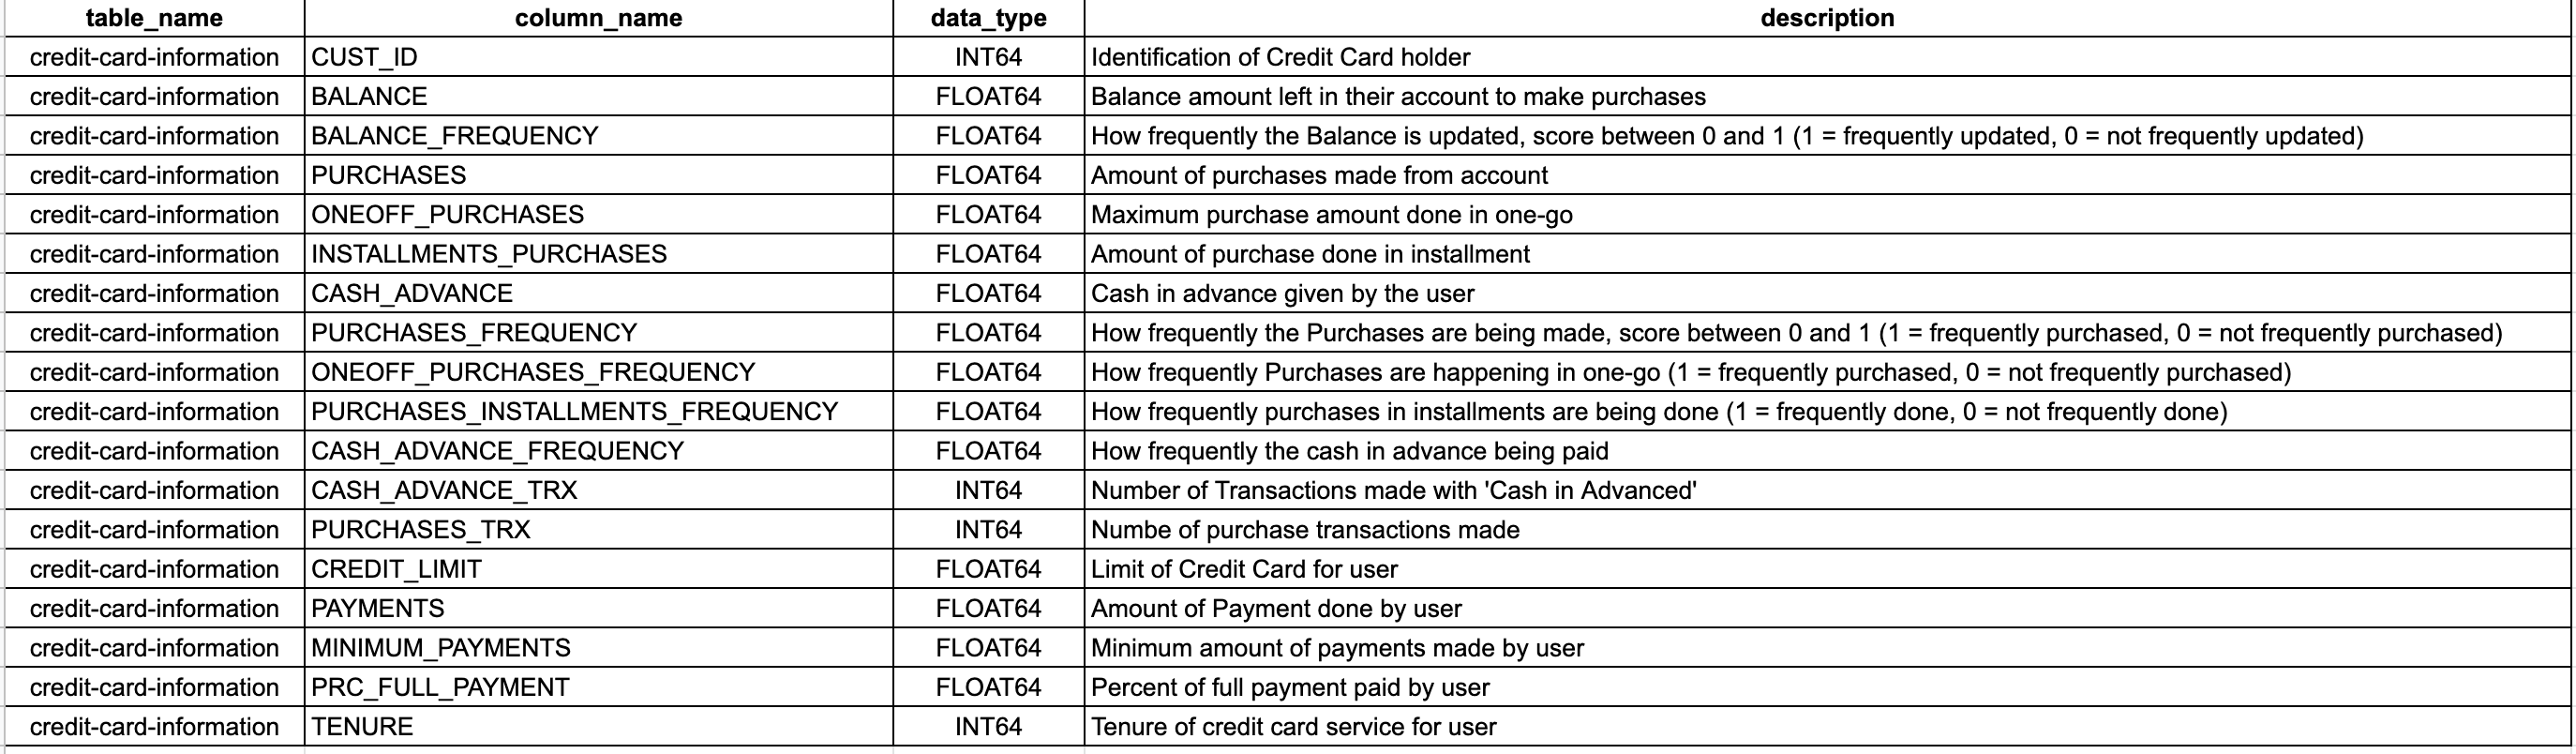



# Library

In [1]:
import pandas as pd # Manipulation Data
import numpy as np  # Manipulation Numerical Data
import matplotlib.pyplot as plt # Visualization
import matplotlib.cm as cm # Visualization 
import seaborn as sns # Statistical Visualisaztion 
import scipy.stats as stats # Statiscal 

# remove warning during visualization
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor # Check Multicollinearity
from sklearn.decomposition import PCA # PCA for dimension reduction
from sklearn.model_selection import cross_val_score # Import Cross_val Method
from sklearn.model_selection import GridSearchCV # To get best parameter from model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay # Evaluation Model


from sklearn.cluster import KMeans # Clustering Model Algortihm
from sklearn.metrics import silhouette_samples # Sampling with silhouette method
from matplotlib.ticker import FixedLocator, FixedFormatter # 
from sklearn.metrics import silhouette_score # Metrics score silhouette method
from sklearn.cluster import DBSCAN # Clustering Model Algorithm
from sklearn.cluster import AgglomerativeClustering as AC # Clustering model Algorithm
from sklearn.mixture import GaussianMixture # Clustering model Algorithm
from sklearn.mixture import BayesianGaussianMixture # Clustering model Algorithm
from sklearn.cluster import SpectralClustering # Clustering model Algorithm

# Data Loading

In [2]:
from google.colab import drive # Import google drice to get data from drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Data/h8dsft_P1G4_John-Kristian-Vieri.csv') # Read Data

In [4]:
df.head() # Showin upper data in dataframe

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185              0.125      45.00             45.00   
1     5069    0.000000              0.000     176.03            176.03   
2     6075  757.964752              0.875     157.40            157.40   
3     6291  264.566591              0.375    1150.00           1150.00   
4     7755  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN               0.0       8  
1     0.000000               NaN               0.0       8  
2  1494.480376       2638.598410               0.0       8  
3  3029.380326         85.428885               0.0       8  
4   215.316424        137.846006               0.0       8

In [5]:
df.tail() # Showin lower data in dataframe

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     2345  9629.808851                1.0        0.0               0.0   
4471     6785  1040.030221                1.0        0.0               0.0   
4472     7347  1322.818587                1.0        0.0               0.0   
4473     8447  1060.391273                1.0        0.0               0.0   
4474     1995  3447.674222                1.0      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035.627320        312.835530               0.0      11  
4473   407.360560        277.084736               0.0      11  
4474   665.239171        817.844662               0.0      11

# Exploratory data analysis

In [6]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [7]:
# Get data type information
df.dtypes

CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## Feature Analysis

In [8]:
# Build Function to see distribution numeric columns.

def distribution_plots(df, variable):
    # Definite figure size
    plt.figure(figsize=(16, 4))

    # Define Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True ,bins=30)
    plt.title('Histogram')
    
    # Show Plots
    plt.show()

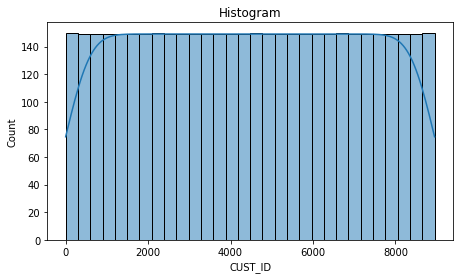

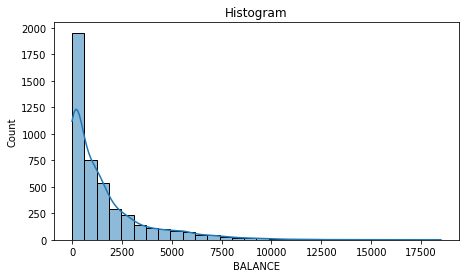

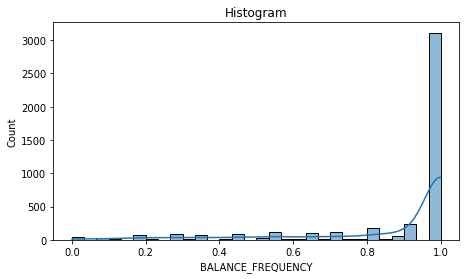

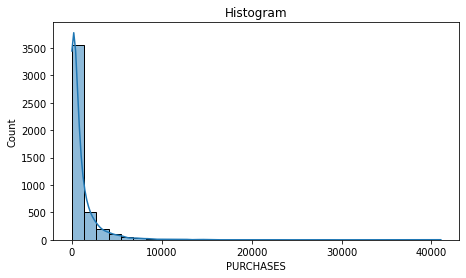

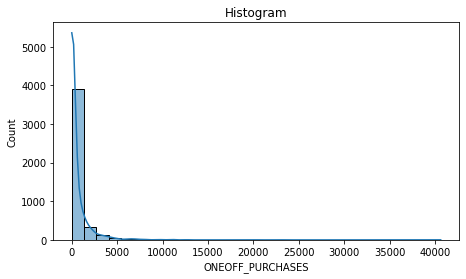

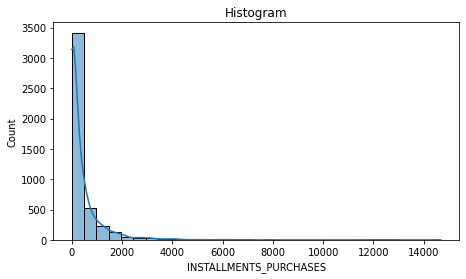

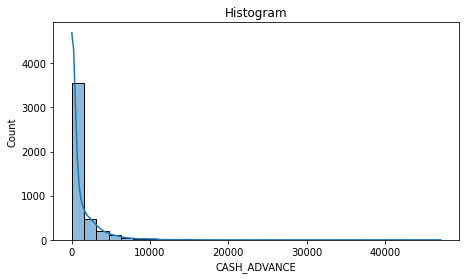

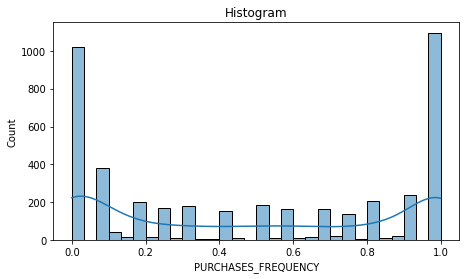

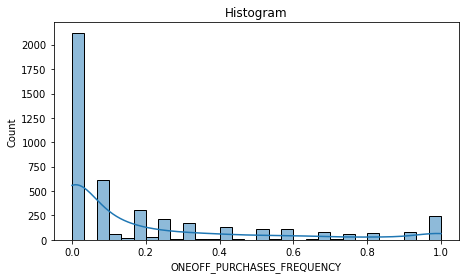

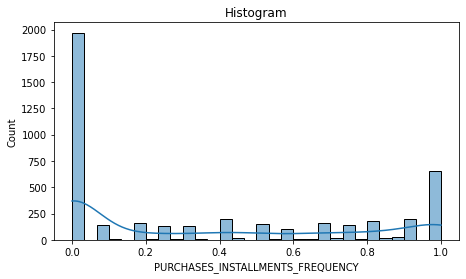

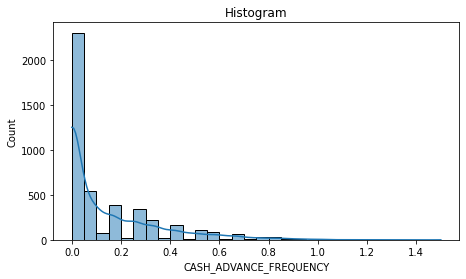

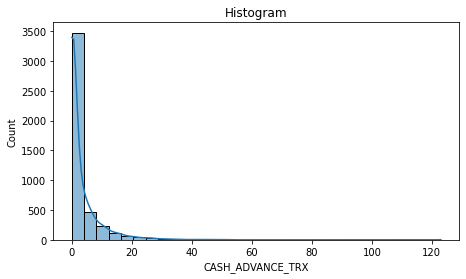

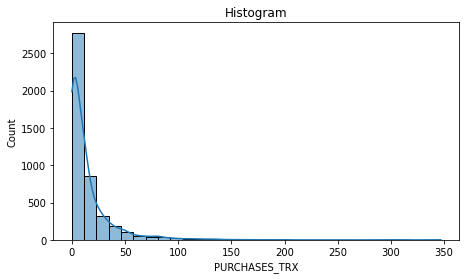

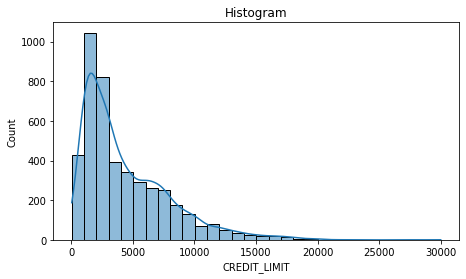

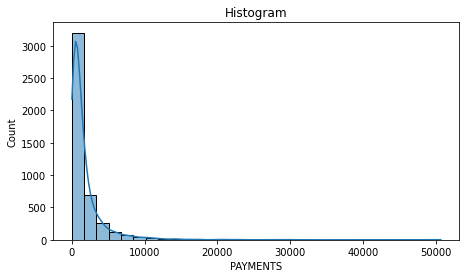

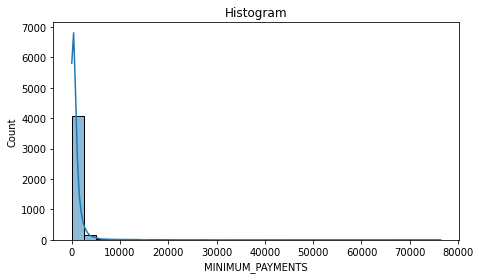

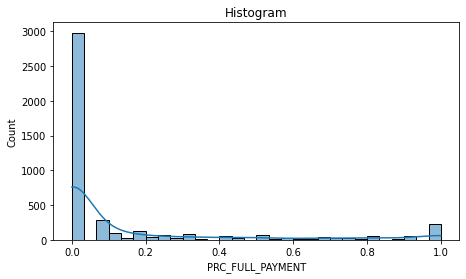

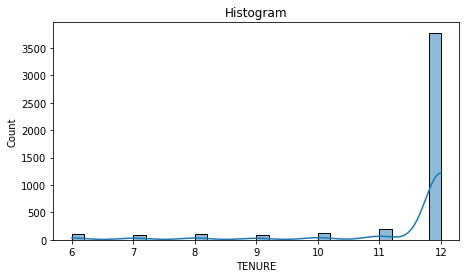

In [9]:
# Showin plot using loop
for columns in df:
  distribution_plots(df,columns)

---

**CONCLUSION**

1. most of the customers have a small balance in their account, and only a few have a balance above `2.500$`

2. Most customers make transactions from their accounts less than `10.000 $`

3. Maximum customer credit limit under `5.000$`

4. Most customers have a tenure of 12 months.

5. Customers who make payments in stages, usually pay under `2.000$`

6. The down payment paid by the customer is below the figure of `10.000 $`


---

## Description of customer statistics of certain columns

In [10]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

---

**RESULTS**

1. Customers with the highest balance limit are at `18,495 $` with an average of `1563 $`

2. The highest payment transaction made by a customer was at `41,050 $`

3. all lowest payouts are `0`

4. The highest down payment was at `47,137 $` with an average of `984 $`

6. Customers have an average tenor of 6 months but most customers choose tenure of more than 11 months.

7. Average customer installment is `407 $`

---

## Correlation Checking

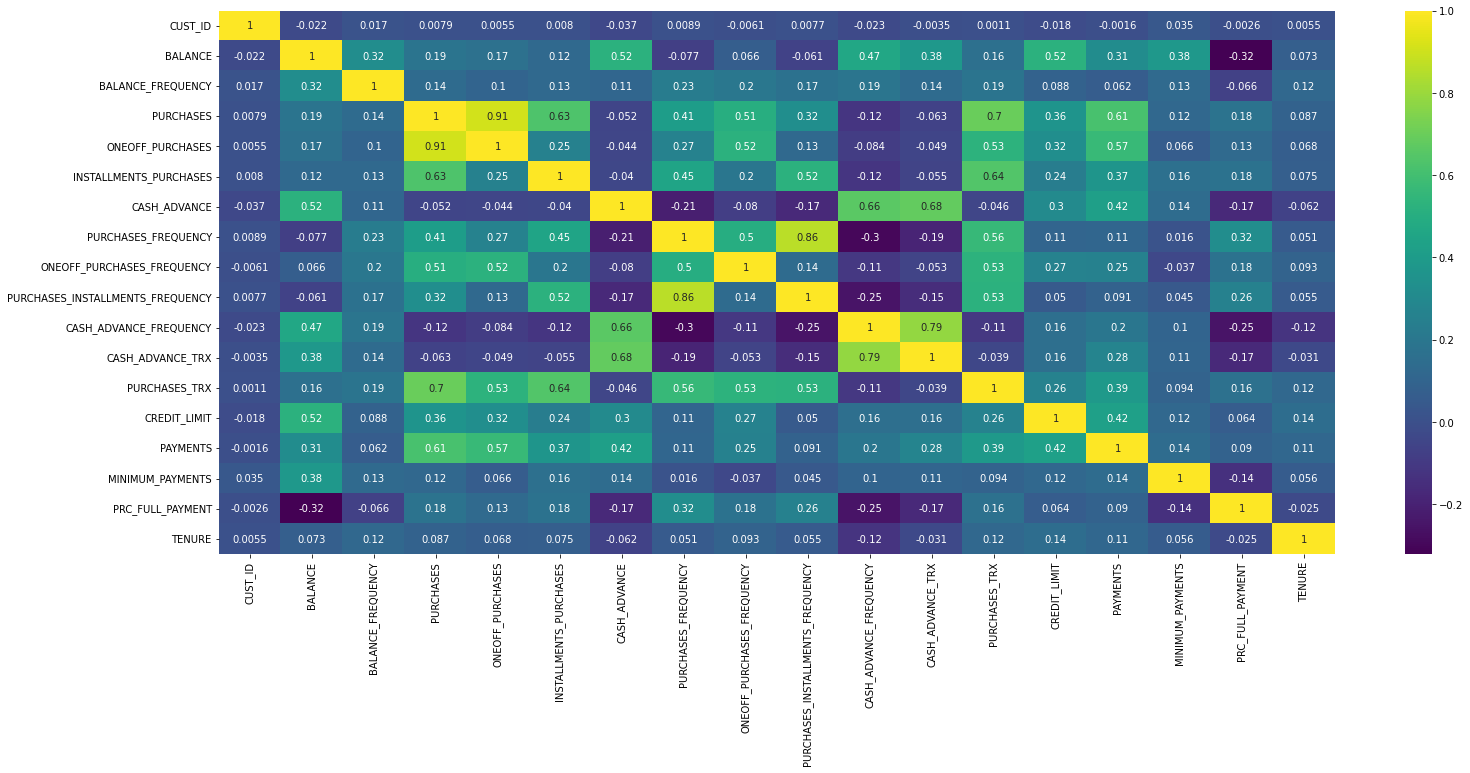

In [11]:
# Correlation between features, to see how dependent a feature is with other features, and see how correlated a feature is with the 

# Define Plot
plt.figure(figsize=(25,10))

# Define HeatMap
sns.heatmap(data=df.corr(), annot=True, cmap='viridis');

---

**RESULT**

1. `CUST_ID`,`BALANCE`,`BALANCE_FREQUENCY` are independent features and do not depend on other features.

2. features containing data about `PURCHASES` depend on each other's features, this condition is also experienced with features containing payment `frequency` and customer payment conditions.

3. all features can be said to be well correlated with the target, except `CASH_ADVANCE_FREQUENCY` but it is not too bad because the value is only small enough to be declared non-correlated.

---

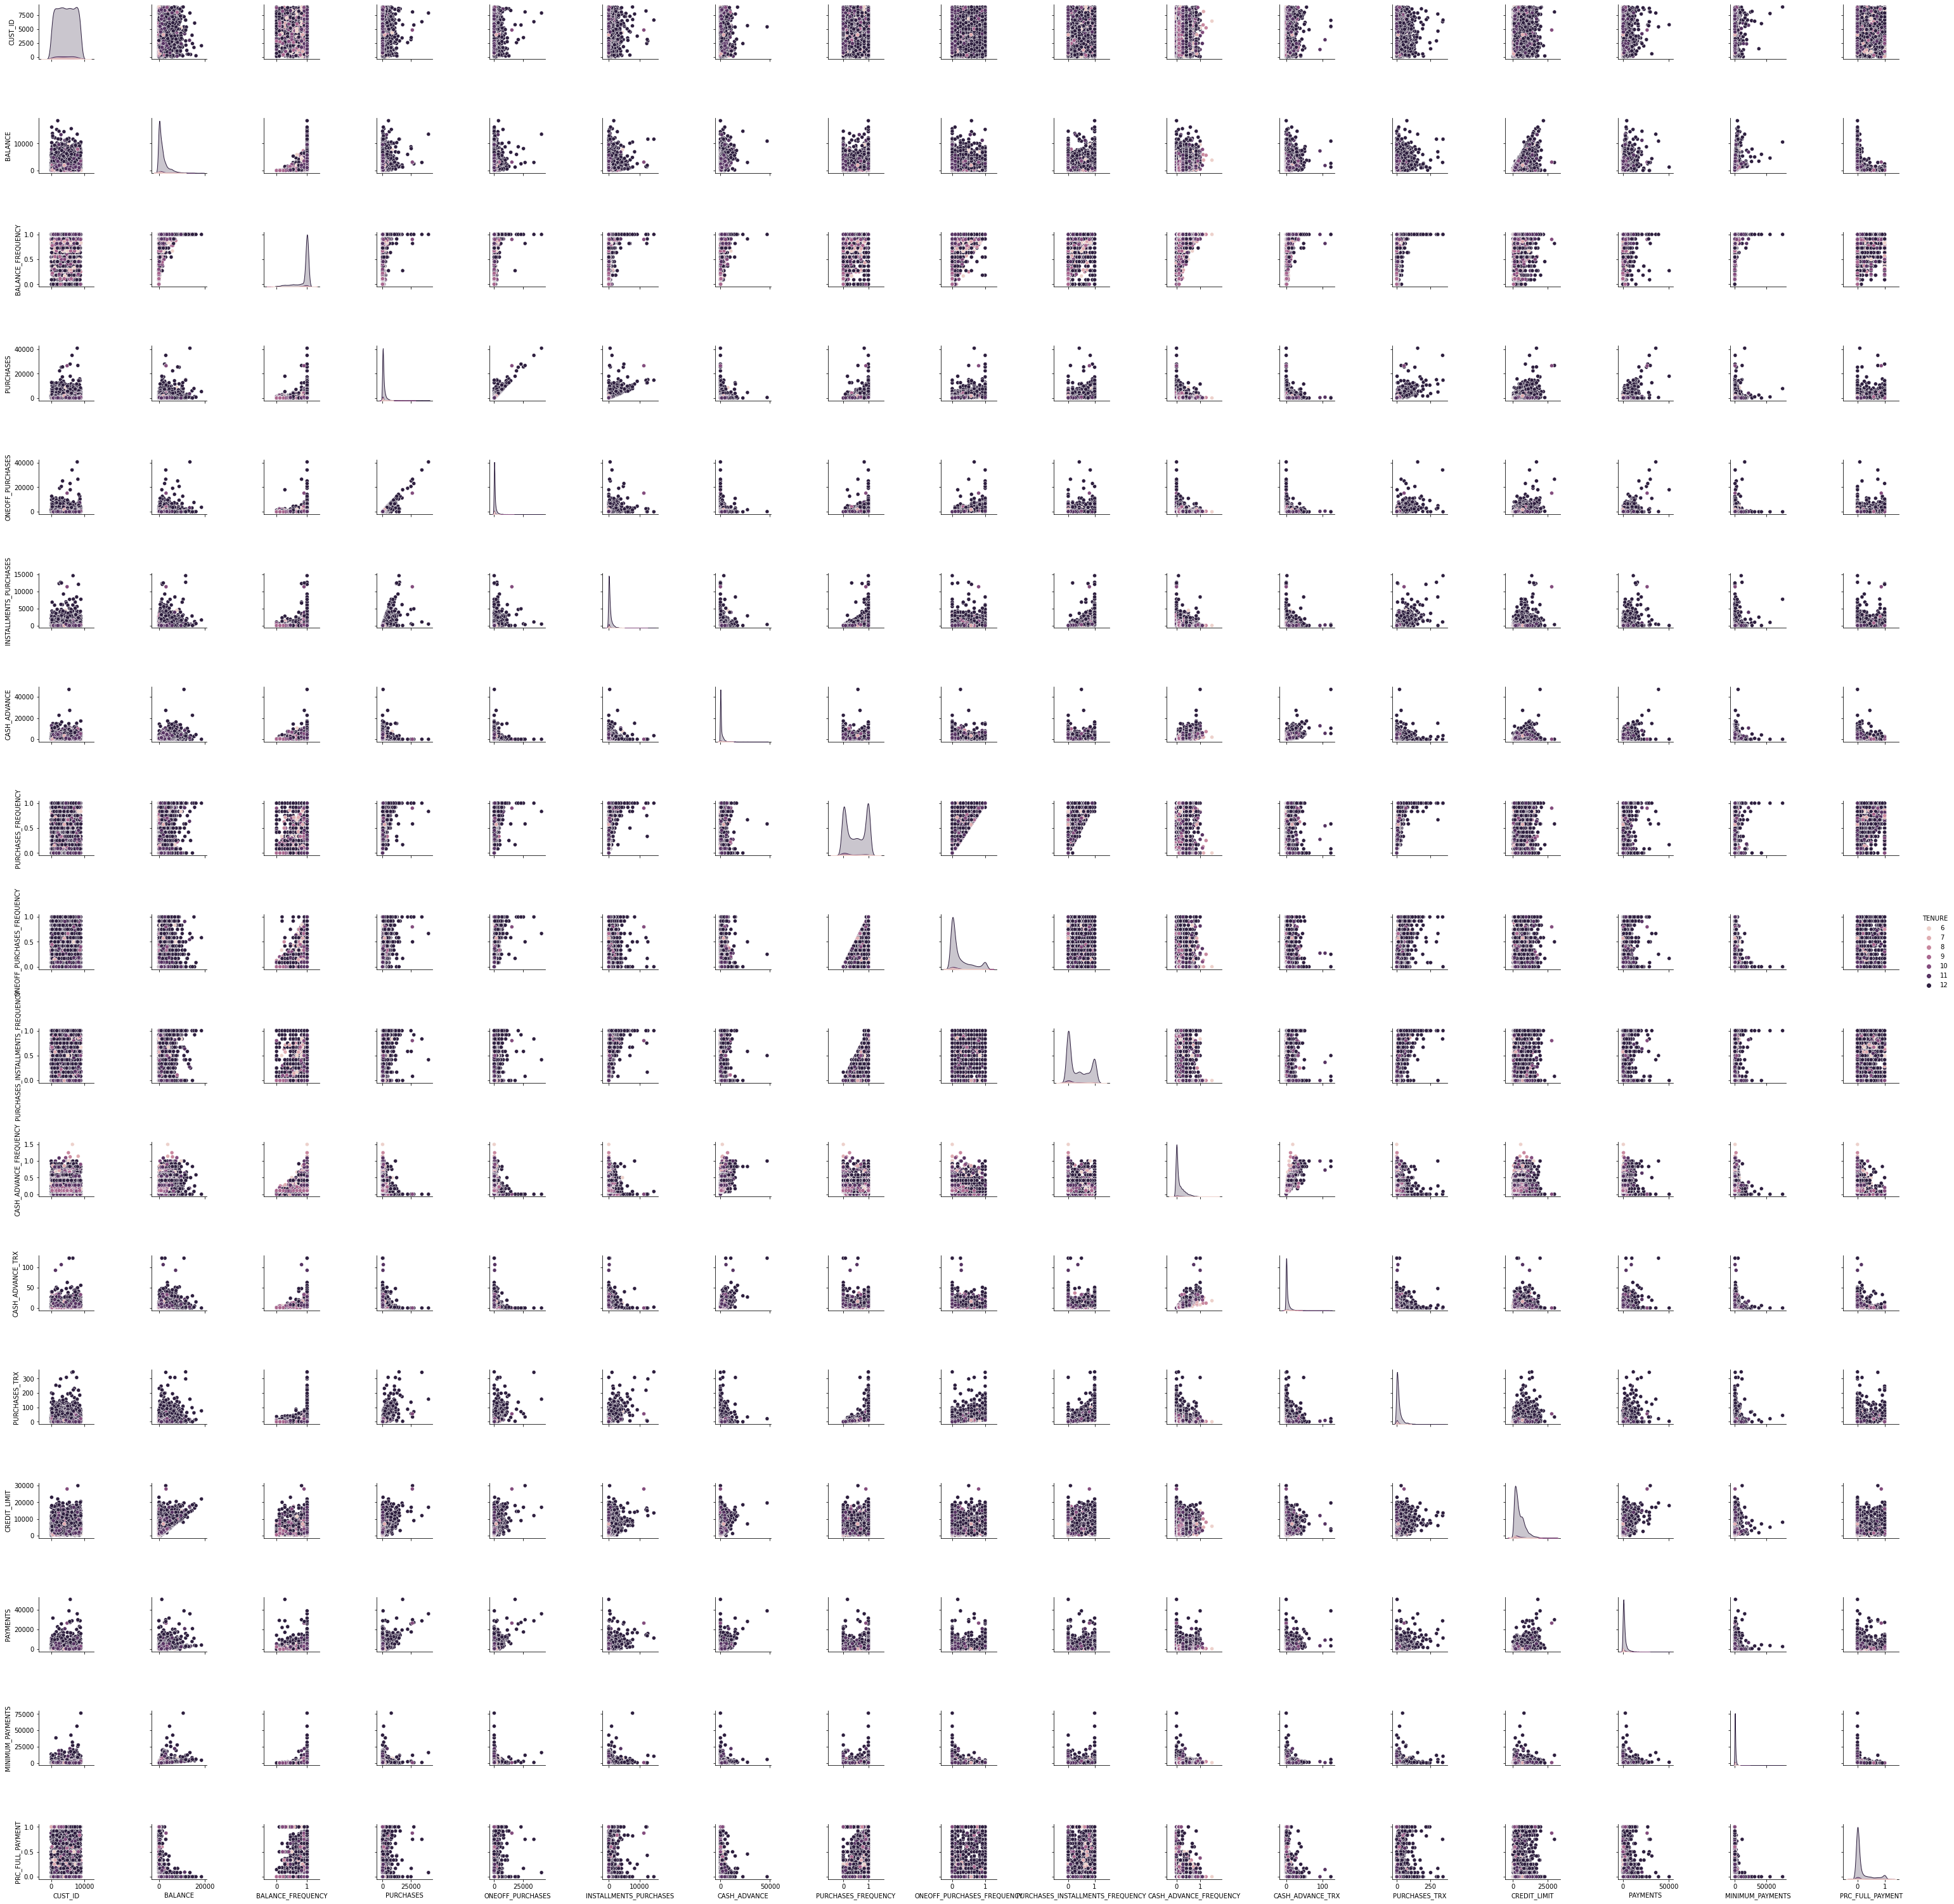

In [12]:
# Distribution of data from the target to each feature, to see the correlation and comparison
sns.pairplot(df, hue="TENURE"); 

## Conclusion Of Exploratory Data Analysis

1. there are customers who have more payments have more limits than other customers.

2. Customers who make transactions with installments are mostly customers who have a limit below the average

3. Customers who make installments are mostly customers who have below average limits

4. Customers who manage to get a large limit, are likely customers who have tenure under 6 months

5. Customers who have more contributions in payments can have a fairly large limit than other customers.

6. `CUST_ID`,`BALANCE`,`BALANCE_FREQUENCY` are independent features and do not depend on other features.

7. features containing data about `PURCHASES` depend on each other's features, this condition is also experienced with features containing payment `frequency` and customer payment conditions.

8. all features can be said to be well correlated with the target, except `CASH_ADVANCE_FREQUENCY` but it is not too bad because the value is only small enough to be declared non-correlated.

# Data Preprocessing

## Data Inference

In [13]:
# Create Inference of data with only needed features
df = df.drop(['CUST_ID'], axis=1) # delete the column `CUST_ID` because it has no effect, because the distribution is all balanced
# Define inference-set
df_inf = df.sample(10, random_state=20)
# Showin Data
df_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1504    26.485924           1.000000     256.44              0.00   
4184  2571.311375           1.000000       0.00              0.00   
2299   347.226798           1.000000    1535.49           1203.69   
406      9.074142           0.888889     555.66              0.00   
1613    93.964086           1.000000     815.34            149.04   
1603  6380.474771           1.000000    4381.33           2080.87   
2557  4007.610043           1.000000      83.00             83.00   
2380  7091.028361           1.000000       0.00              0.00   
1664     0.413670           0.181818    1187.42           1187.42   
3657  3271.424058           0.888889    1173.28              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1504                  256.44      0.000000             0.666667   
4184                    0.00   6537.278532             0.000000   
2299                  331.80      0.000000             0.900000   
406                   555.66      0.000000             1.000000   
1613                  666.30      0.000000             0.916667   
1603                 2300.46      0.000000             0.666667   
2557                    0.00   9003.084705             0.083333   
2380                    0.00   2137.809373             0.000000   
1664                    0.00      0.000000             0.916667   
3657                 1173.28   4122.912645             0.888889   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1504                    0.000000                          0.666667   
4184                    0.000000                          0.000000   
2299                    0.500000                          0.500000   
406                     0.000000                          0.888889   
1613                    0.250000                          0.750000   
1603                    0.416667                          0.500000   
2557                    0.083333                          0.000000   
2380                    0.000000                          0.000000   
1664                    0.916667                          0.000000   
3657                    0.000000                          0.777778   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1504                0.000000                 0             12        1500.0   
4184                0.583333                16              0        3000.0   
2299                0.000000                 0             24        1000.0   
406                 0.000000                 0              9        1500.0   
1613                0.000000                 0             14        2500.0   
1603                0.000000                 0             45       11500.0   
2557                0.250000                12              1       10000.0   
2380                0.250000                 5              0        8500.0   
1664                0.000000                 0             11        6000.0   
3657                0.333333                 4             16        5000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1504   235.328971        162.324595          0.166667      12  
4184  4513.686142        583.336071          0.100000      12  
2299   778.913464        149.966517          0.250000      10  
406    547.194469          2.167809          0.000000       9  
1613   361.786239        125.693866          0.300000      12  
1603  1297.408037       2129.183138          0.000000      12  
2557  1308.070478       1221.251121          0.000000      12  
2380  1835.361842       2701.584337          0.000000      12  
1664  1214.034802          9.925051          0.000000      12  
3657   817.177789        999.725550          0.000000       9

In [14]:
# Remove Inference-Set from Dataset
df_train_test = df.drop(df_inf.index)
# Showin data 
df_train_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN               0.0       8  
1        0.000000               NaN               0.0       8  
2     1494.480376       2638.598410               0.0       8  
3     3029.380326         85.428885               0.0       8  
4      215.316424        137.846006               0.0       8  
...           ...               ...               ...     ...  
4470  2468.988022       2134.295731               0.0      11  
4471   290.129620        287.994171               0.0      11  
4472  1035

## Feature Selection

In [15]:
# Separate between X (feature) and y (target) remove interdependent columns, to avoid overfitting

# Feature
X = df.drop(['TENURE'], axis=1)
# Target
y = df['TENURE']

In [16]:
# Split Train dan Test w/ test size 20 %

# Import Method
from sklearn.model_selection import train_test_split
# Define Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
# Print Train
print('Train Size : ', X_train.shape)
# Print Test
print('Test Size  : ', X_test.shape)

Train Size :  (3580, 16)
Test Size  :  (895, 16)


In [17]:
# Get Numerical Columns and Categorical Columns

# Define Numeric Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
# Define Cathegorical Columns
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Print Numerical Columns
print('Numerical Columns : ', num_columns)
# Print Cathegorical COlumns
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
Categorical Columns :  []


## Data Cleaning

### Missing Value

In [18]:
X_train.isna().sum() # Train Check Miss-Val

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    124
PRC_FULL_PAYMENT                      0
dtype: int64

In [19]:
X_test.isna().sum() # Test Check Miss-val

BALANCE                              0
BALANCE_FREQUENCY                    0
PURCHASES                            0
ONEOFF_PURCHASES                     0
INSTALLMENTS_PURCHASES               0
CASH_ADVANCE                         0
PURCHASES_FREQUENCY                  0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY     0
CASH_ADVANCE_FREQUENCY               0
CASH_ADVANCE_TRX                     0
PURCHASES_TRX                        0
CREDIT_LIMIT                         0
PAYMENTS                             0
MINIMUM_PAYMENTS                    31
PRC_FULL_PAYMENT                     0
dtype: int64

In [20]:
y_train.isna().sum().sum() # Target Check Miss-val

0

In [21]:
y_test.isna().sum().sum() # Target Check Miss-val

0

---

**RESULT**

This missing value is categorized as `MNAR (Missing Not At Random)`, this is because the missing value is contained in a feature that contains data about the customer's 'Minimum Payout', which should not allow for missing values. minimum for the customer, it will be calculated using the `MEAN` value, to reduce the risk of excess or discrepancy in the predictions of lower or higher paying customers.



---

#### Handling missing Value

In [22]:
# Imputation `Mean` for X_train
X_train['MINIMUM_PAYMENTS'].fillna(X_train['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [23]:
# Imputation `Mean` for X_test
X_test['MINIMUM_PAYMENTS'].fillna(X_test['MINIMUM_PAYMENTS'].mean(),inplace=True)

### **Outlier**

In [24]:
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Define Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Define Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # Showin Plot
    plt.show()

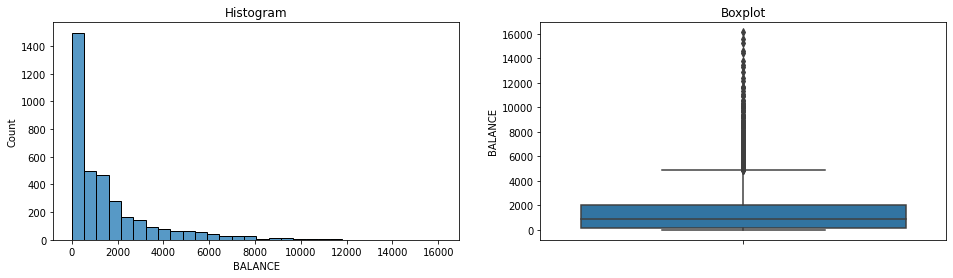

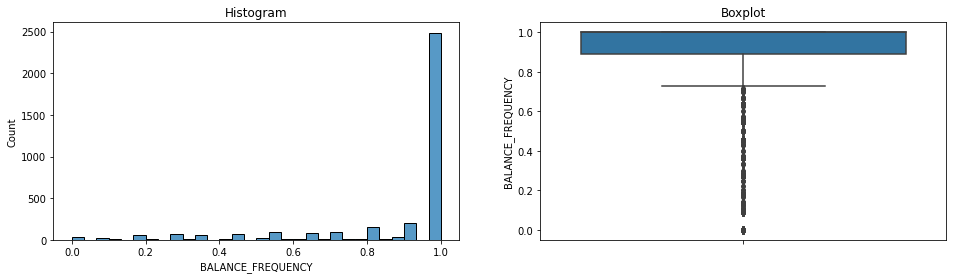

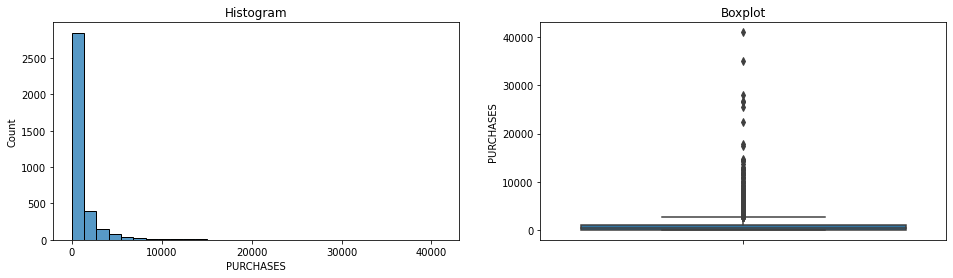

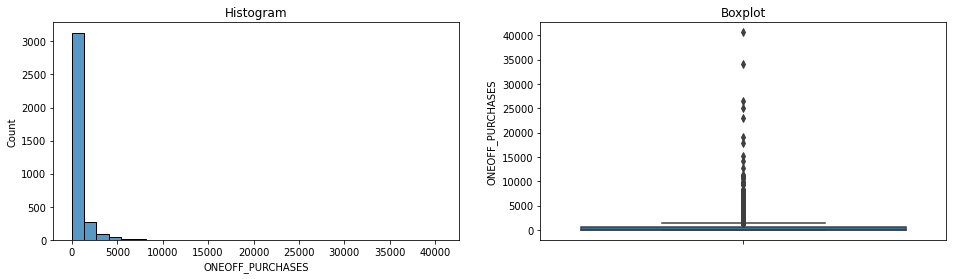

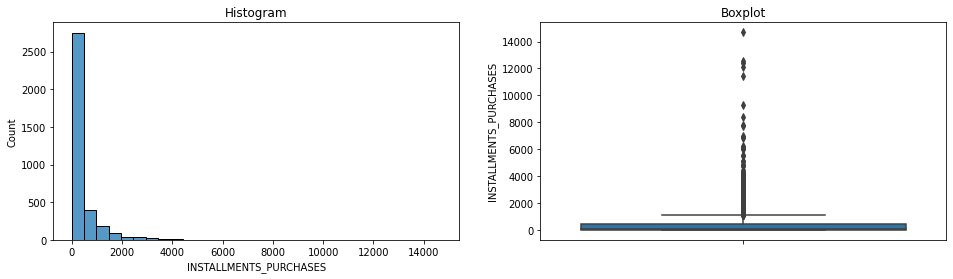

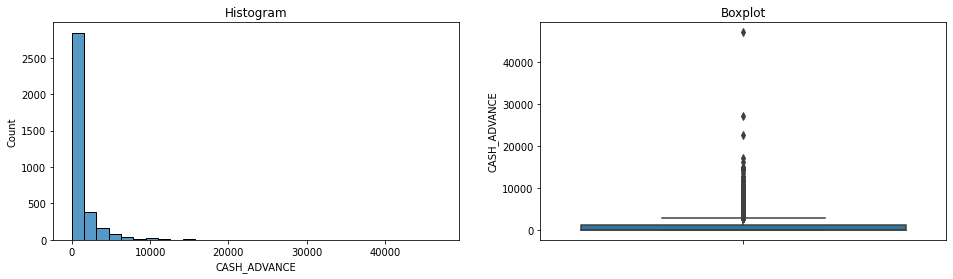

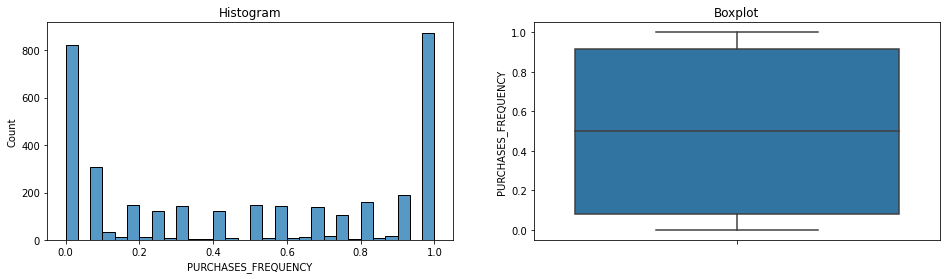

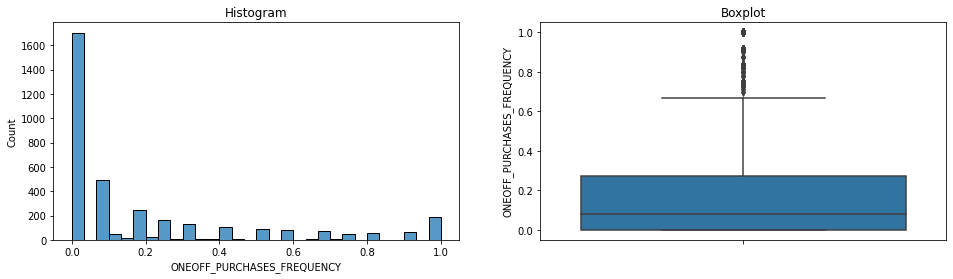

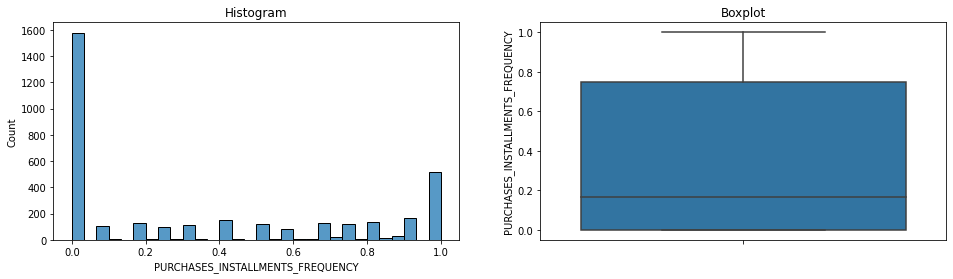

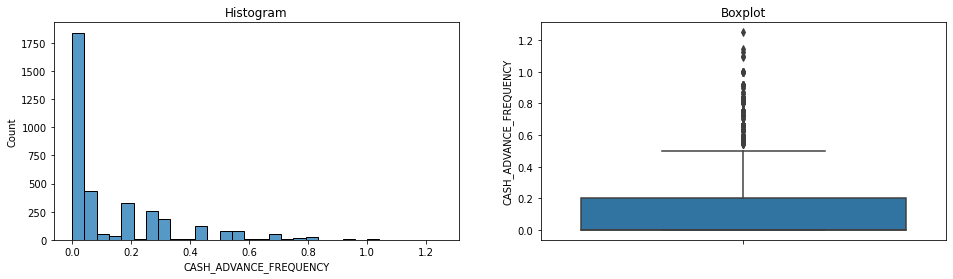

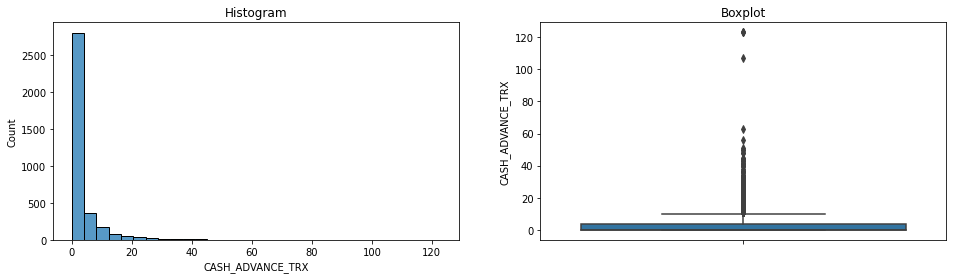

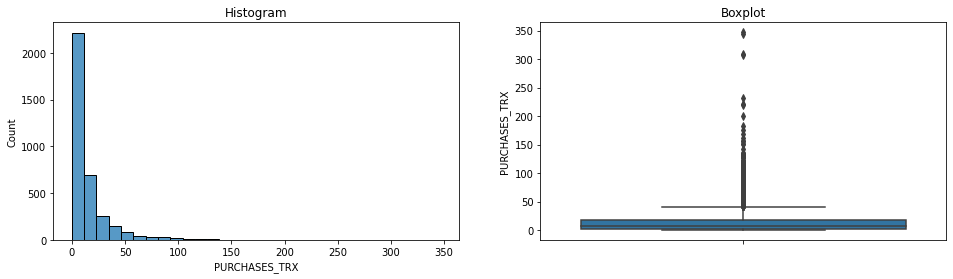

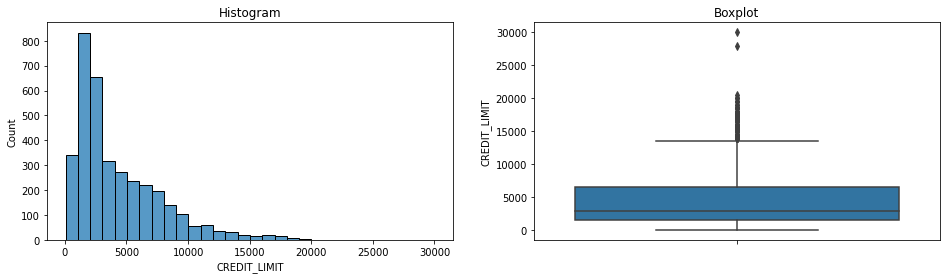

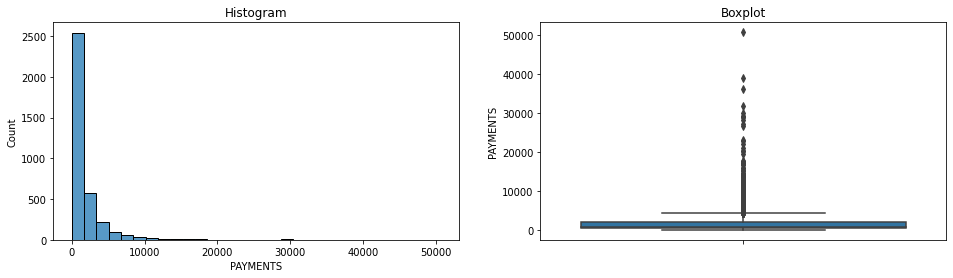

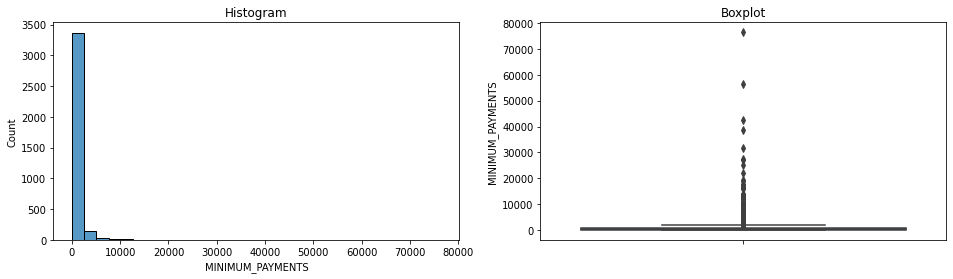

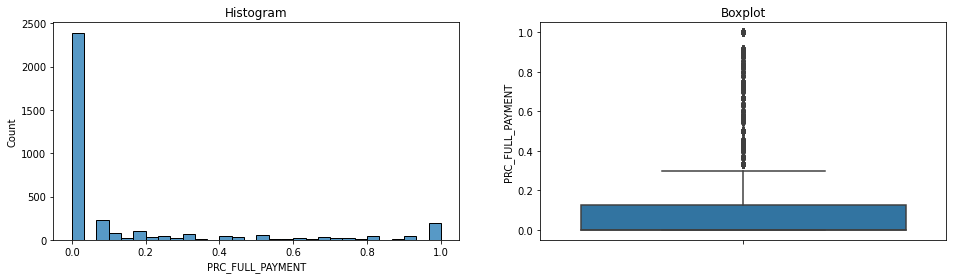

In [25]:
# Showin distribution plot to detection outlier with loop
for columns in num_columns:
  diagnostic_plots(X_train,columns)

In [26]:
# Create Function for checking skew
def skewness(df, variable):
  skew = df[variable].skew()
  return print('\nSkewness Value : ',columns,skew)

In [27]:
# Showin skew value
for columns in num_columns:
  skewness(df,columns)


Skewness Value :  BALANCE 2.3290088807150915

Skewness Value :  BALANCE_FREQUENCY -2.026529776439142

Skewness Value :  PURCHASES 7.071705718331177

Skewness Value :  ONEOFF_PURCHASES 9.951056583113456

Skewness Value :  INSTALLMENTS_PURCHASES 6.330629906494809

Skewness Value :  CASH_ADVANCE 5.638109294257693

Skewness Value :  PURCHASES_FREQUENCY 0.05875497991848613

Skewness Value :  ONEOFF_PURCHASES_FREQUENCY 1.5483193819148602

Skewness Value :  PURCHASES_INSTALLMENTS_FREQUENCY 0.5082957786202944

Skewness Value :  CASH_ADVANCE_FREQUENCY 1.8342106501962343

Skewness Value :  CASH_ADVANCE_TRX 6.420103784668197

Skewness Value :  PURCHASES_TRX 4.747507133980154

Skewness Value :  CREDIT_LIMIT 1.498947716941148

Skewness Value :  PAYMENTS 5.747503259811283

Skewness Value :  MINIMUM_PAYMENTS 14.669771084332645

Skewness Value :  PRC_FULL_PAYMENT 1.9752382754788178


---

**RESULTS**

From the visualization above, it can be seen that if a lot of data from features are detected as outliers, and have a skew value that is far from 0, it can be concluded that there is a lot of data that is not normal, therefore decided to handle outliers using `Winsorizer` because it will not removes data where almost all of the data is detected as outliers, and will also clean data that is really extreme.

---

#### Handling Outlier

In [28]:
!pip install feature-engine # Install Winsorizer
from feature_engine.outliers import Winsorizer # Import Outlier Handling Method

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 44.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [29]:
X_train.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [30]:
# Create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both',  # cap left, right or both tails 
                          fold=0.05,   
                          variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

windsoriser.fit(X_train)

X_train = windsoriser.transform(X_train)
X_test = windsoriser.transform(X_test)

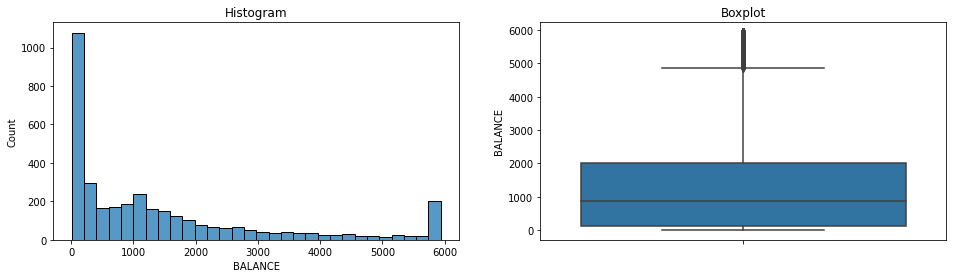

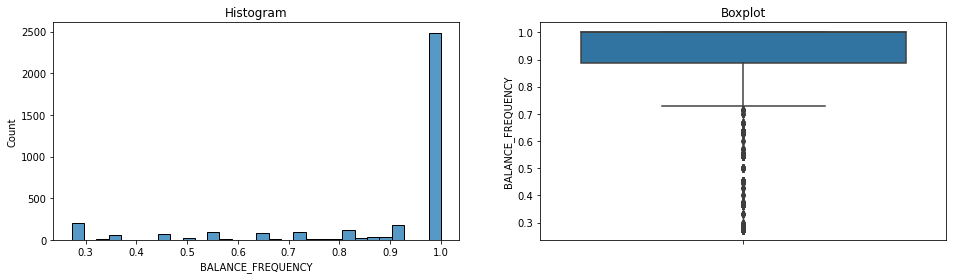

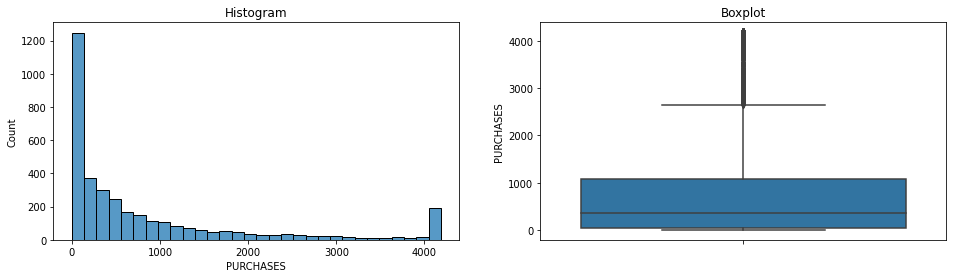

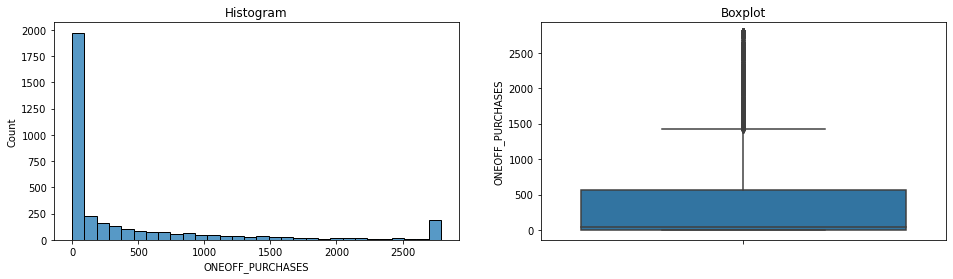

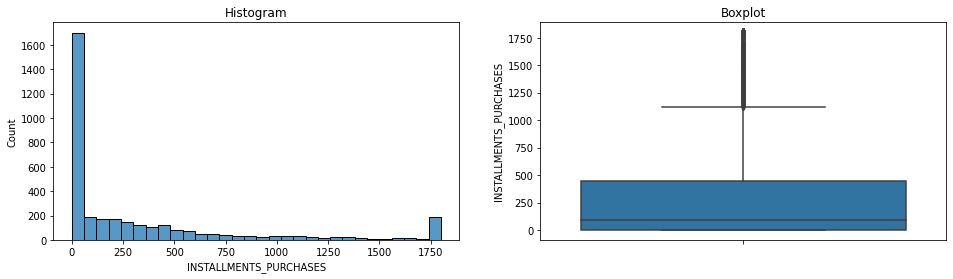

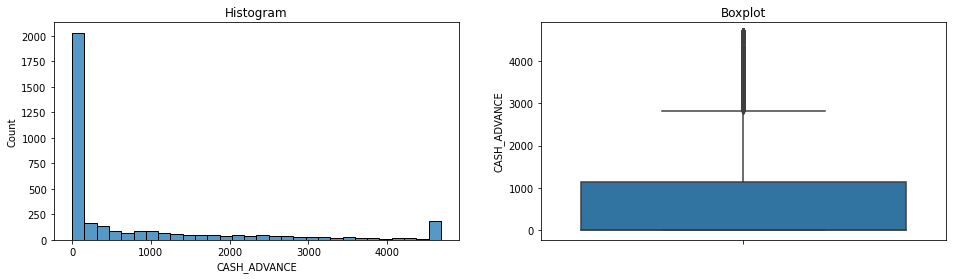

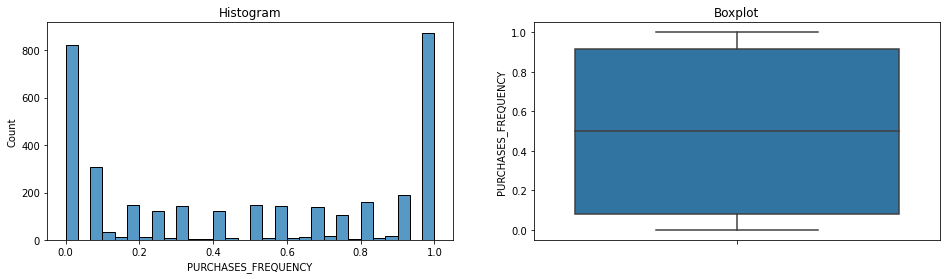

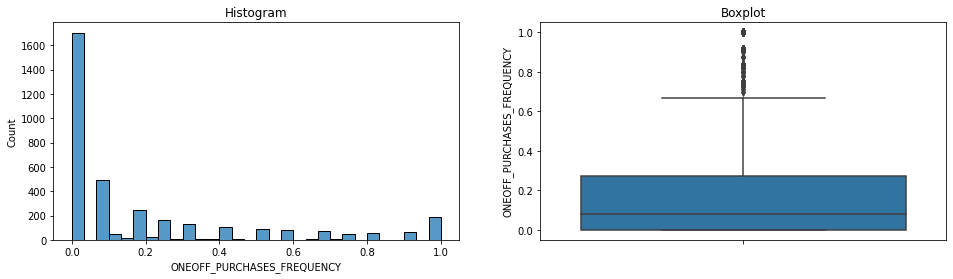

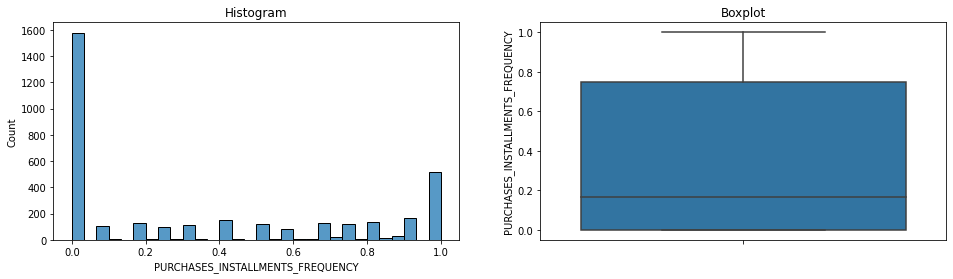

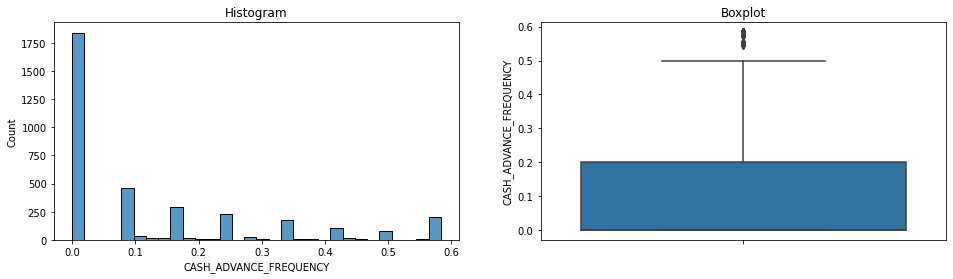

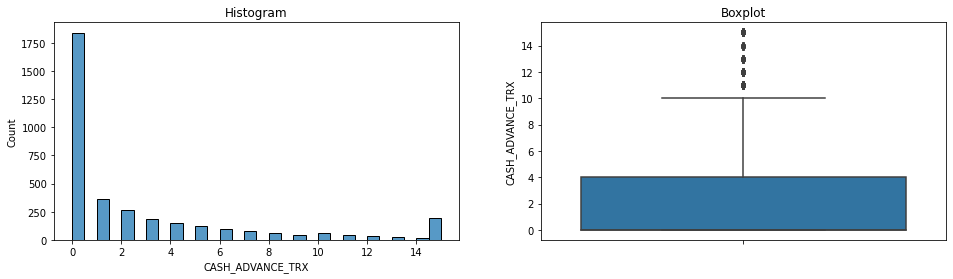

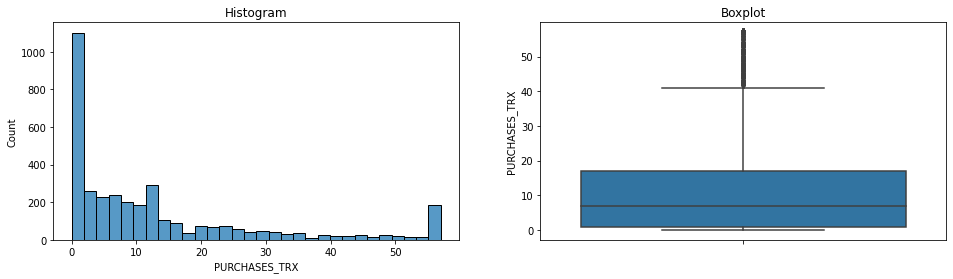

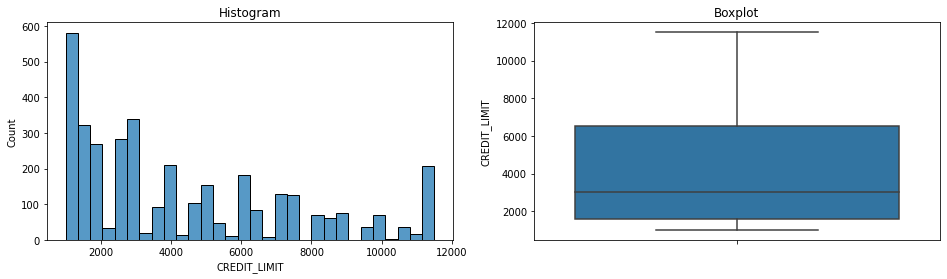

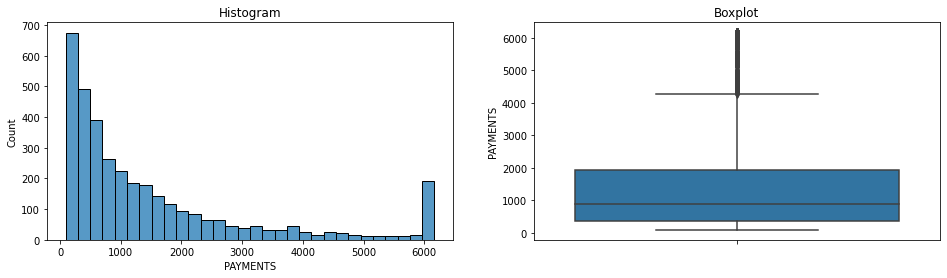

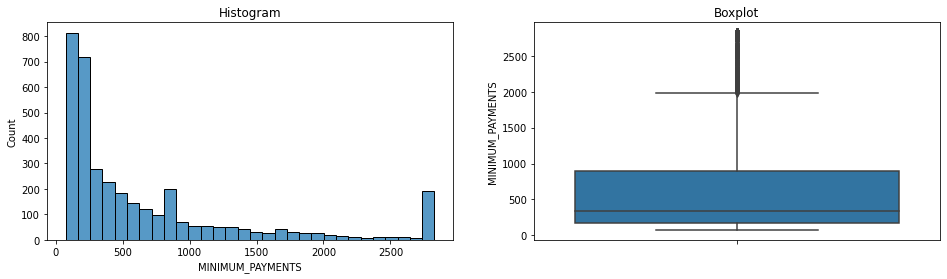

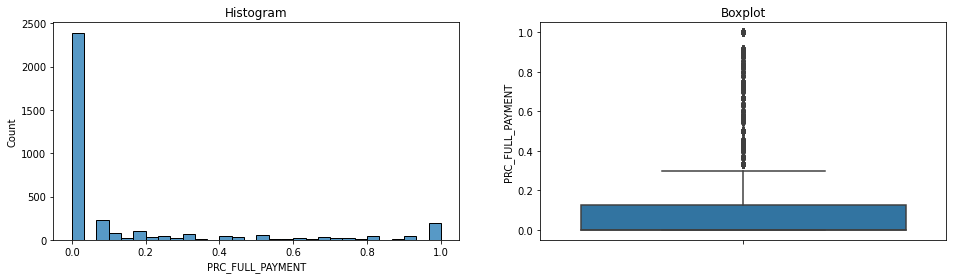

In [31]:
# Showin plots after capping
for columns in num_columns:
  diagnostic_plots(X_train,columns)

## Feature Engineering

In [32]:
# Split Train-Set and Test-Set based on Column Type (Numerical/Categorical)

# Define Numeric for X_train
X_train_num = X_train[num_columns]
# Define Cathegoric for X_train
X_train_cat = X_train[cat_columns]
# Define Numeric for X_test
X_test_num = X_test[num_columns]
# Define Cathegoric for X_test
X_test_cat = X_test[cat_columns]

### Feature Scalling

In [33]:
# Feature Scaling using MinMaxScaler because data is skew

# Import Methode
from sklearn.preprocessing import MinMaxScaler

# Define Scaler
scaler = MinMaxScaler()
# Fitting Scaler for X_train
scaler.fit(X_train_num)

# Define X_train that has been scaled
X_train_num_scaled = scaler.transform(X_train_num)
# Define X_test that has been scaled
X_test_num_scaled = scaler.transform(X_test_num)
# Showin Result
X_train_num_scaled

array([[1.20439814e-01, 8.75000172e-01, 0.00000000e+00, ...,
        2.06802147e-02, 7.27805822e-02, 0.00000000e+00],
       [1.60561126e-02, 1.00000000e+00, 3.84102361e-01, ...,
        2.42357866e-01, 3.84192680e-02, 8.33333000e-01],
       [1.44302263e-01, 1.00000000e+00, 3.48330464e-02, ...,
        7.08106009e-02, 5.53580521e-01, 0.00000000e+00],
       ...,
       [7.35522309e-05, 8.47222432e-01, 1.32743506e-01, ...,
        7.51913599e-02, 0.00000000e+00, 0.00000000e+00],
       [6.68272171e-03, 6.25000516e-01, 1.12444734e-01, ...,
        1.08055114e-01, 3.04359449e-02, 4.16667000e-01],
       [9.99560501e-01, 1.00000000e+00, 0.00000000e+00, ...,
        4.22326643e-01, 1.00000000e+00, 0.00000000e+00]])

### Multicollinearity Checking

In [34]:
# Define `VIF` to dataframe
vif = pd.DataFrame()
vif["feature"] = X_train_num.columns

In [35]:
# View `VIF` results of all features
vif["VIF"] = [variance_inflation_factor(X_train_num.values, i) for i in range(len(X_train_num.columns))]
# Showin `VIF`
vif

feature        VIF
0                            BALANCE   7.018028
1                  BALANCE_FREQUENCY   6.316769
2                          PURCHASES  36.414331
3                   ONEOFF_PURCHASES  19.516078
4             INSTALLMENTS_PURCHASES  11.755836
5                       CASH_ADVANCE   4.684321
6                PURCHASES_FREQUENCY  27.630735
7         ONEOFF_PURCHASES_FREQUENCY   8.379096
8   PURCHASES_INSTALLMENTS_FREQUENCY  22.111577
9             CASH_ADVANCE_FREQUENCY  10.877890
10                  CASH_ADVANCE_TRX  10.164801
11                     PURCHASES_TRX   9.860252
12                      CREDIT_LIMIT   4.593731
13                          PAYMENTS   3.746309
14                  MINIMUM_PAYMENTS   4.535182
15                  PRC_FULL_PAYMENT   1.770187

---

**RESULT**

* there are 10 features that are related to other features, and there are only 5 features that are not related to other features, this can be seen from the value of some features that exceed the value of 5. and from these results it can be concluded that there is a possibility that the data can be reduced to 10 features , this is because of the 15 features there are only 5 features that are not related to other features.

---

### Dimensionality Reduction

In [36]:
# Define `pca` with the number of components to be reduced with the train-set that has been called out
pca=PCA(n_components=10).fit(X_train_num_scaled)
# Show Explained variance ratio
pca.explained_variance_ratio_

array([0.35675701, 0.22633512, 0.10689369, 0.06707224, 0.05843995,
       0.04428749, 0.03585306, 0.02824848, 0.02222188, 0.01399083])

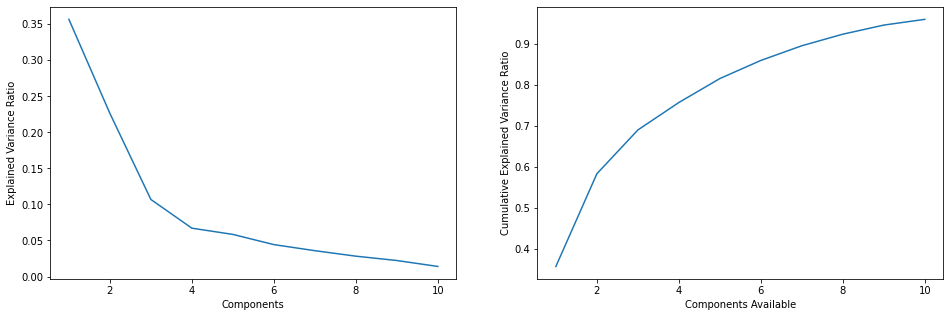

In [37]:
# Define Plot
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
# define first axis plot 
ax[0].plot(range(1,11),pca.explained_variance_ratio_)
# Define X label
ax[0].set_xlabel('Components')
# Define Y label
ax[0].set_ylabel('Explained Variance Ratio')

# Define second Axis
ax[1].plot(range(1,11),np.cumsum(pca.explained_variance_ratio_))
# Define Second label axis x label
ax[1].set_xlabel('Components Available')
# Define Second label axis y label
ax[1].set_ylabel('Cumulative Explained Variance Ratio')
plt.show()

---

**RESULT**

* it can be seen that the fault on the plot on the left states that 4 components are good reductions but 6 components are better reductions because they have a cumulative EVR value of 80%, and 8 components have a cumulative EVR value of 90%, and it can be concluded that the best reduction is in 4,6 and 8 components

---

In [38]:
# perform `PCA` with 6 components
from sklearn.decomposition import IncrementalPCA

# Define final `PCA`
pca_final = IncrementalPCA(n_components=6)

# Fit Train-set with `PCA`
X_train_pca_final = pca_final.fit_transform(X_train_num_scaled)
X_test_pca_final  = pca_final.transform(X_test_num_scaled)

# Show result
print(X_train_num_scaled.shape)
print(X_train_pca_final.shape)

(3580, 16)
(3580, 6)


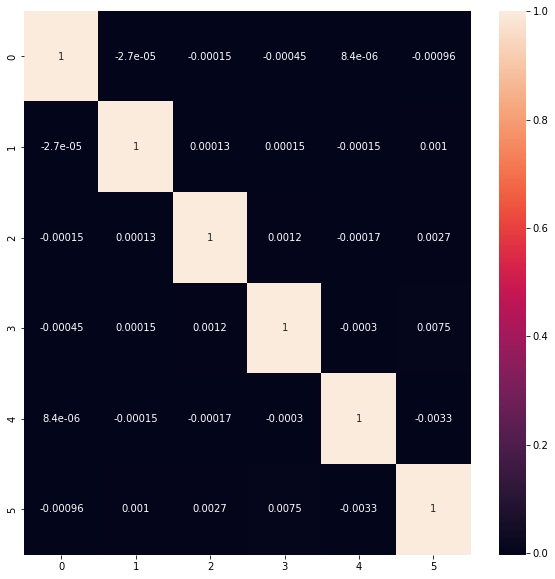

In [39]:
# Check correlation after reduction
corrmat = np.corrcoef(X_train_pca_final.transpose())

# Plot correlation
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True);

---

**RESULT**

* It seems that each feature has no connection with other features
---

In [40]:
# Shape Checking
corrmat.shape

(6, 6)

### Concate Columns

In [41]:
# Concate Columns

# Concate Num Scalled columns with Ordinal Encoding Columns
X_train_final = np.concatenate([X_train_pca_final, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_pca_final, X_test_cat], axis=1)
X_train_final

array([[-0.8539013 , -0.07341223,  0.06725381,  0.01426541, -0.31091672,
        -0.01583389],
       [ 1.12720721, -0.28747437,  0.35842419,  0.45045203,  0.13673866,
         0.47940371],
       [-0.10002661, -0.23591563,  0.40970643, -0.34477825,  0.00370185,
         0.00914342],
       ...,
       [ 0.44861298, -0.57530705,  0.56436491, -0.0903214 , -0.04665016,
        -0.17791124],
       [-0.00431528, -0.3465295 , -0.19918417,  0.29314297,  0.46790888,
         0.21964322],
       [-1.00634267,  1.30929561,  0.28306462, -0.04037049,  0.19135869,
         0.12108681]])

In [42]:
# Display Concate's Result as a DataFrame

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

0         1         2         3         4         5
0    -0.853901 -0.073412  0.067254  0.014265 -0.310917 -0.015834
1     1.127207 -0.287474  0.358424  0.450452  0.136739  0.479404
2    -0.100027 -0.235916  0.409706 -0.344778  0.003702  0.009143
3     0.153090  0.267922 -0.461829  0.078049 -0.340931 -0.226593
4    -0.825169  0.021882 -0.041488  0.314213 -0.200929 -0.062581
...        ...       ...       ...       ...       ...       ...
3575 -0.585461 -0.393357 -0.128600 -0.203537 -0.215666  0.117557
3576 -0.626182 -0.670148 -0.238737 -0.009254  0.121976 -0.258051
3577  0.448613 -0.575307  0.564365 -0.090321 -0.046650 -0.177911
3578 -0.004315 -0.346529 -0.199184  0.293143  0.467909  0.219643
3579 -1.006343  1.309296  0.283065 -0.040370  0.191359  0.121087

[3580 rows x 6 columns]

# Modelling Using Clustering

## K-Means Clustering

In [43]:
# Model Definition
km = KMeans(random_state=22)
# Model Training
kmf = km.fit_predict(X_train_final)


### Model Evaluation

In [44]:
kmf  is km.labels_

True

In [45]:
km.cluster_centers_.shape

(8, 6)

---

**RESULT**

* can be seen in the shape if there are 8 clusters, it looks the same as the data that has been reduced 

---

### Model Optimization

#### *Elbow Method*

In [46]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_train_final)
    sse.append(km.inertia_)

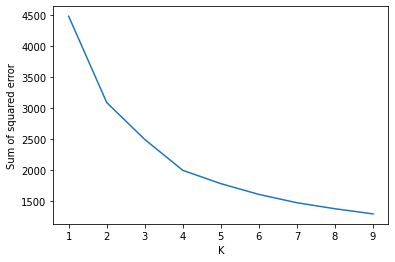

In [47]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

---

**RESULT**

* From the plotting results above, it can be concluded that clustering with this model gives good results if the number of clusters is in 4 clusters, this is because the line forms the last fault in the 4th cluster.

---

#### *Silhouette Method*

In [48]:
# define K
kmeans_per_k = [KMeans(n_clusters=k, random_state=11).fit(X_train_final)
                for k in range(1, 10)] # Showin loop in range 1-10 cluster
inertias = [model.inertia_ for model in kmeans_per_k]

In [49]:
# Cluster best value
silhouette_score(X_train_final, km.labels_)

0.26155019476965297

---

**RESULT**

* from the metrics above it is shown if the best cluster value is at 2.36

---

In [50]:
# Define silhouette score per K with looping
silhouette_scores = [silhouette_score(X_train_final, model.labels_)
                     for model in kmeans_per_k[1:]]

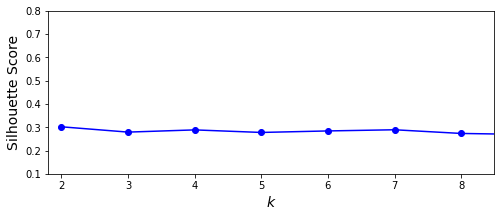

In [51]:
# Define plot size
plt.figure(figsize=(8, 3))
# Define K range
plt.plot(range(2, 10), silhouette_scores, "bo-")
# Define font size and give a label name for Horizontal line
plt.xlabel("$k$", fontsize=14)
# Define font size and give a label name for Vertical line
plt.ylabel("Silhouette Score", fontsize=14)
# Define Axis
plt.axis([1.8, 8.5, 0.1, 0.8])
# Showin Plot
plt.show()

---

**RESULT**

* From the plotting above, it can be seen that the silhouette value closest to the best value is 2 clusters, followed by 4,6 and 7 clusters whose lines look the same and only 2 clusters have different values, and the best possibility is that the cluster is under 4 clusters according to score silhouette.

---

In [52]:
# Silhouette Analysis


# Define Function in range cluster with X
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the y-axis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
        # Define scatter with loop
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
        # Define Main Title
        ax2.set_title(" Visualization of the clustered data.")
        # Define x-label title
        ax2.set_xlabel("Feature space for the 1st feature")
        # Define y-label title
        ax2.set_ylabel("Feature space for the 2nd feature")
        # Define Main Tittle
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=20, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3017168422461232
For n_clusters = 3 The average silhouette_score is : 0.2785723637684224
For n_clusters = 4 The average silhouette_score is : 0.2874245504081838
For n_clusters = 5 The average silhouette_score is : 0.2774801307307031


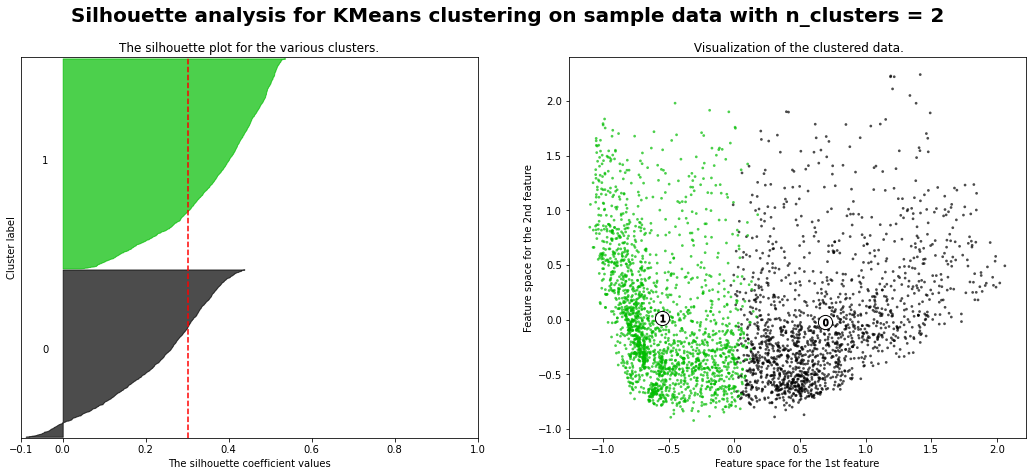

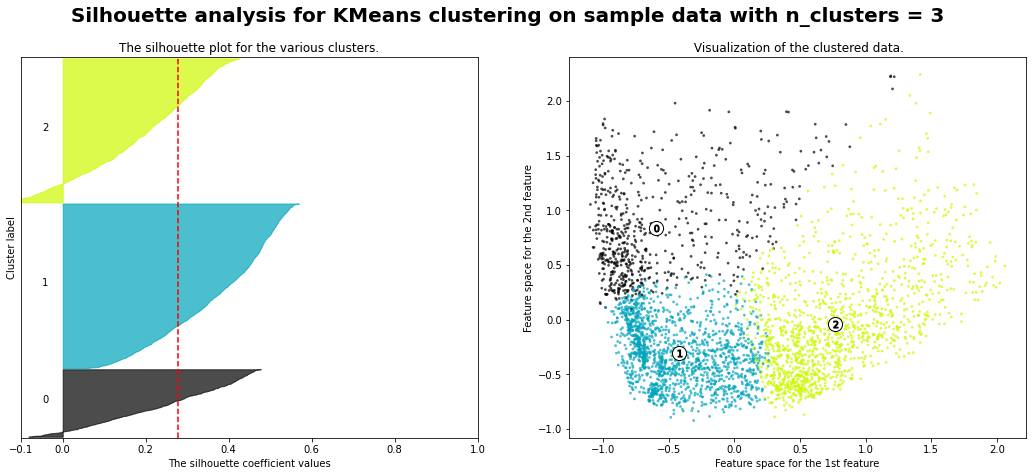

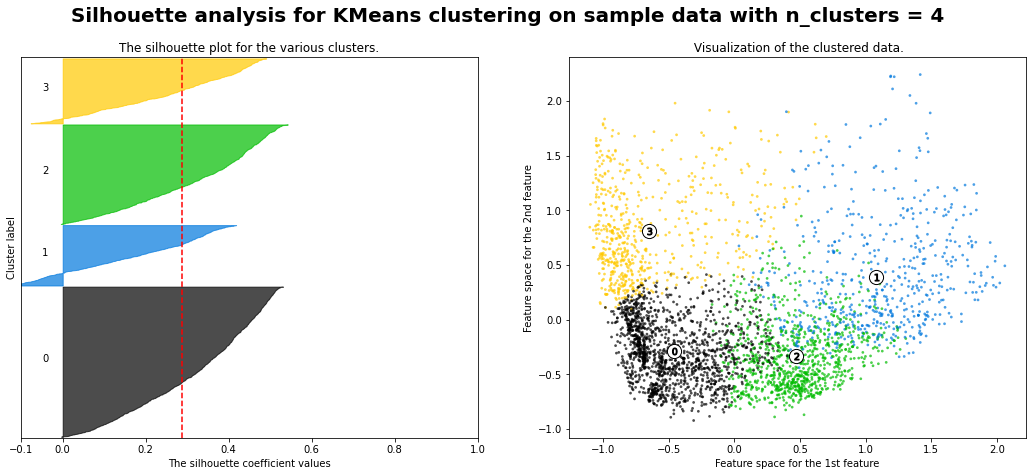

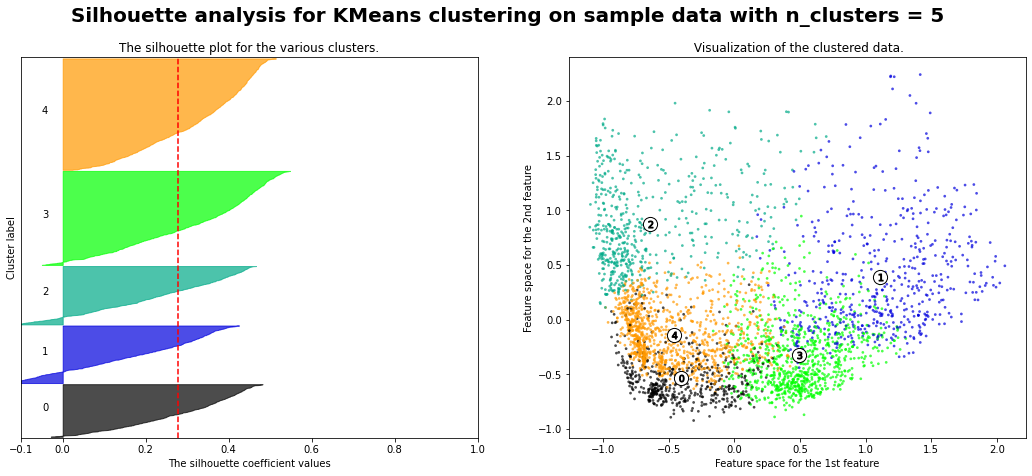

In [53]:
# Define K
K =[2,3,4,5]
# Plot silhouette
plot_silhouette(K, X_train_final)

---

*CONCLUSION*

* from the plot above it is clear that from the division of 5 clusters all cross the boundary line, but it can also be seen from the scatterplot if the best separator is in clusters 2,3, and 4 clusters, but because 4 clusters have some bad results, 3 clusters will be selected and not choose 2 clusters, because the more clusters the better.

---

In [54]:
# Define K-Means with 3 cluster
km3 = KMeans(n_clusters=3, random_state=22)

In [55]:
# Predict
kmf_3 = km3.fit_predict(X_train_final)
kmf_3

array([1, 0, 1, ..., 0, 1, 2], dtype=int32)

#### *Dimension reduction up to 3 components*

In [56]:
# Define PCA with 3 components
pca2 = PCA(n_components=3)
# Fit data using PCA with 3 components
r3com = pca2.fit_transform(X_train_final)

In [57]:
# Showin data with 3 clusters
reduced = pd.DataFrame(r3com)
reduced 

0         1         2
0    -0.853904 -0.073426 -0.067239
1     1.126894 -0.287056 -0.361011
2    -0.099983 -0.235889 -0.408905
3     0.153195  0.267778  0.462193
4    -0.825218  0.021851  0.040935
...        ...       ...       ...
3575 -0.585418 -0.393351  0.128720
3576 -0.626015 -0.670376  0.239473
3577  0.448667 -0.575287 -0.563809
3578 -0.004421 -0.346460  0.197924
3579 -1.006488  1.309323 -0.282903

[3580 rows x 3 columns]

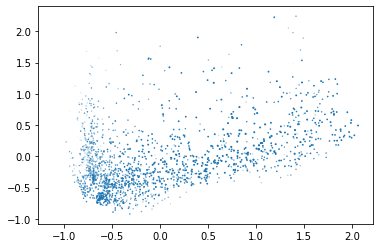

In [58]:
# plot result 3 cluster
plt.scatter(reduced[0], reduced[1],reduced[2]);

---

**RESULT**

* From the plot above, it is clear that the separation distance from the cluster is clear
---

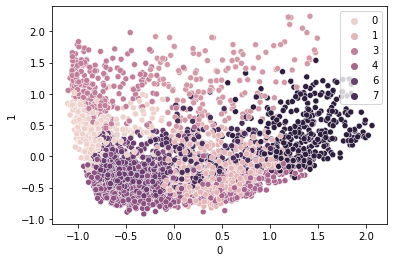

In [59]:
# Default component scatterplot
sns.scatterplot(x = reduced[0],y=reduced[1],hue=km.fit_predict(X_train_final));

---

**RESULT**

* seen if the data overlap, and it is feared that there will be a significant misplacement of predictions.

---

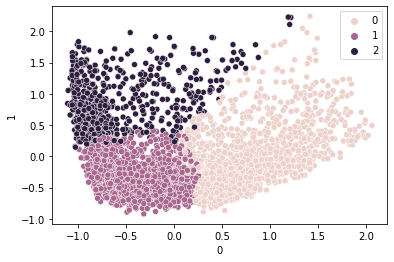

In [60]:
# Plot predict result 3 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=km3.fit_predict(X_train_final));

---

**RESULT**

* it can be seen that with 3 clusters there is a clear separation, and it can be seen that there are outliers from the prediction data that ride on other cluster groups, but it doesn't matter because it is only a little and not far away. far, and from these results it can be said that the results are quite good.

---

### Analysis from modelling

In [61]:
# Concate data with clustering
df_clusters_kmean=pd.concat([X_train, pd.DataFrame({'cluster':km3.labels_})], axis=1)
# Showin data
df_clusters_kmean.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    8.638247           0.272727      45.00             45.00   
1    8.638247           0.272727     176.03            176.03   
2  757.964752           0.875000     157.40            157.40   
3  264.566591           0.375000    1150.00           1150.00   
4  440.613643           1.000000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0               0.0            1.0        1000.0   
1                     0.0               0.0            1.0        7000.0   
2                     0.0               0.0            6.0        1200.0   
3                     0.0               0.0            1.0        1200.0   
4                     0.0               0.0            1.0        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
0    90.156748        896.110282               0.0      1.0  
1    90.156748        896.110282               0.0      0.0  
2  1494.480376       2638.598410               0.0      1.0  
3  3029.380326         85.428885               0.0      0.0  
4   215.316424        137.846006               0.0      1.0

In [62]:
# Grouping features by average
groupby_cluster = df_clusters_kmean.groupby('cluster').mean()
# Show result
groupby_cluster

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                 
0.0      1188.527398           0.858938  921.228197        510.775581   
1.0      1241.448967           0.876338  912.647816        486.645002   
2.0      1211.843875           0.882726  856.084929        448.723392   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0.0                  363.975143    487.581236             0.533377   
1.0                  363.582874    558.850059             0.525881   
2.0                  359.669909    620.210215             0.537728   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0.0                        0.218722                          0.397716   
1.0                        0.212412                          0.392147   
2.0                        0.217172                          0.399500   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0.0                    0.072183          1.433333      13.687963   
1.0                    0.082388          1.720158      13.551779   
2.0                    0.084348          1.785171      13.754753   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
cluster                                                                 
0.0       4315.719697  1416.968977        577.883350          0.188152  
1.0       4200.734819  1398.273041        591.375288          0.170268  
2.0       4324.139302  1365.059434        597.680079          0.175948

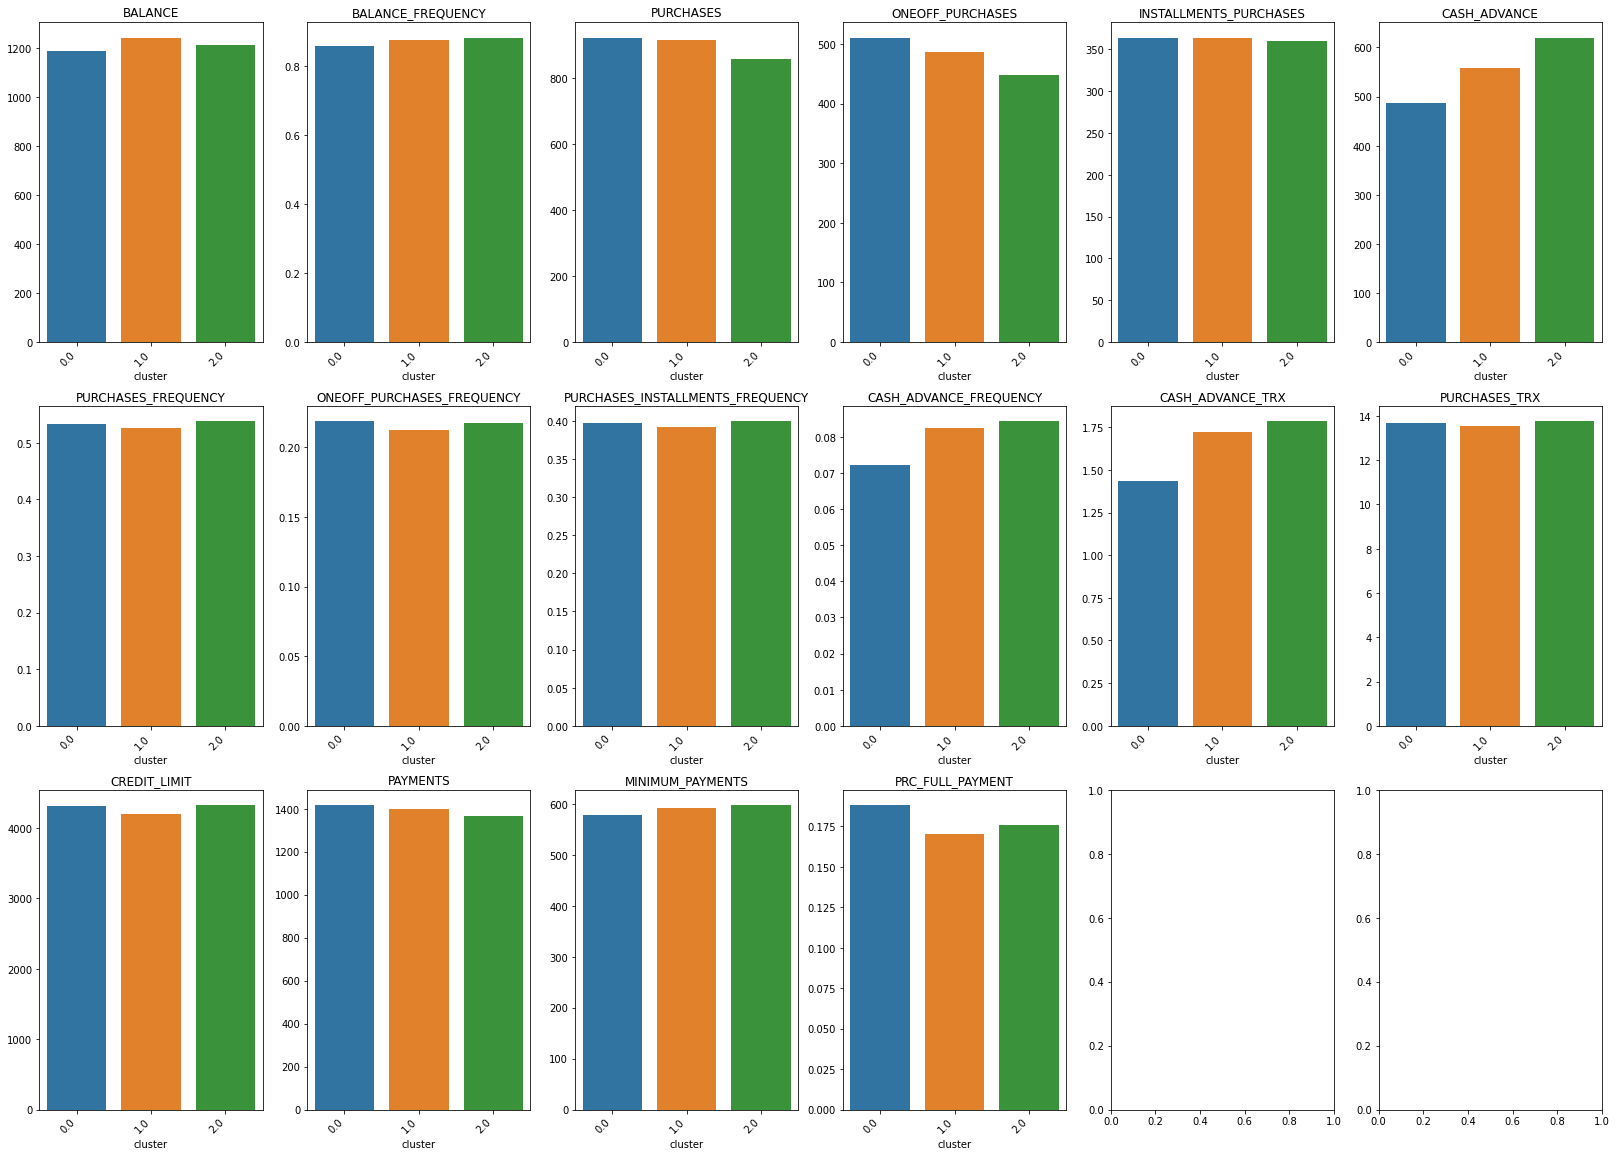

In [63]:
# Plot result grouping

# Define plot size
fig,axes=plt.subplots(3,6, figsize=(28,20))
# Define axis
axe= axes.ravel()
# Showin result with loop
for i,col in enumerate(groupby_cluster.columns):
    sns.barplot(x=groupby_cluster[col].index, y=groupby_cluster[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

---

#### ***Analysis from clustering results***

1.  From the `balance` feature, it can be seen that most customers do not have a significantly different limit difference, which can be said if the customer has a limit whose value is around the average.

2. from the `purchases` feature it can be seen if the value is also not significantly different, and from this result it can also be concluded if the payment transactions made by the customer are said to be stable and almost equal.

3. from the `installment purchases` feature it is also seen if the comparison is not significantly different, this can also be concluded if the customer who paid the advance is stable or equivalent

4. From the `cash_advance` feature, it can be seen that there are quite visible differences between clusters, where cluster 0 is the smallest in paying down payments, followed by cluster 1 above, and cluster 3 is the highest, from here the results can be seen that there are differences in advance payments from customers.


---

#### ***Modelling Conclusion***

1. From the results of the multicollinearity test using the `VIF` metric, it is possible that the data can be reduced to 10 features because there are 10 features that are interrelated with other features, then the `multicollinearity' test is carried out, and the results obtained if the data can be reduced to 6 components. because the error that leads to the best `EVR` value is in 6 components with a `cumulative EVR` value of 80%.


2. From the test results of the dimension reduction method for clustering, it is found that if the best dimension reduction is 4 components to 2 components, but the best is 3 components, because at the time of model optimization using the `elbow_methode` method and the `silue_method` method, the results obtained if the best dimension reduction is in components 2,3 and 4. Then a step is chosen to reduce the dimensions to 3 components, because the best distribution results are in 3, unlike 4 components which can still predict clusters to places where the clusters are clearly different, and by using 3 there is no significant difference between these components. differences in cluster distribution, and also with 3 clusters can add to a better conclusion than just 2 components





---

## Agglomerative Clustering

In [64]:
# Model Definition

agg_2=AC(n_clusters=2)
agg_3=AC(n_clusters=3)
agg_4=AC(n_clusters=4)
agg_5=AC(n_clusters=5)
agg_6=AC(n_clusters=6)

In [65]:
# Model Training
agg_2.fit_predict(X_train_final)
agg_3.fit_predict(X_train_final)
agg_4.fit_predict(X_train_final)
agg_5.fit_predict(X_train_final)
agg_6.fit_predict(X_train_final)

array([0, 1, 0, ..., 1, 4, 2])

## Model Evaluation

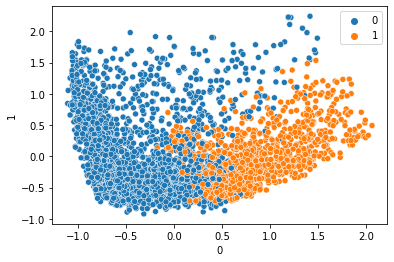

In [66]:
# Agglomerative 2 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_2.fit_predict(X_train_final));

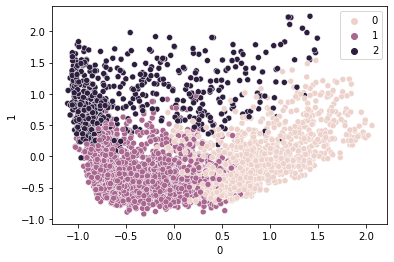

In [67]:
# Agglomerative with 3 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_3.fit_predict(X_train_final));

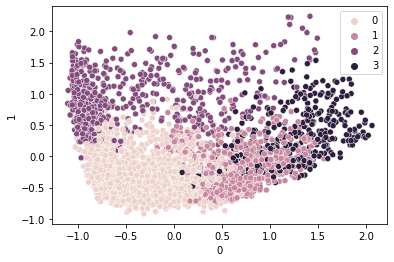

In [68]:
# Agglomerative 4 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_4.fit_predict(X_train_final));

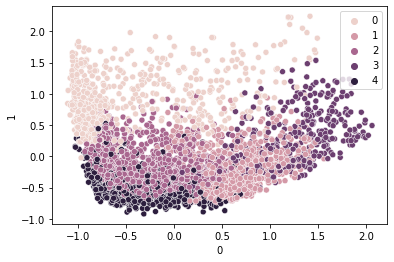

In [69]:
# Agglomerative 5 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_5.fit_predict(X_train_final));

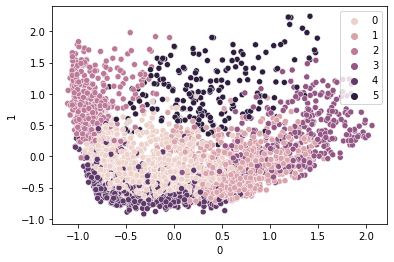

In [70]:
# Agglomerative 6 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_6.fit_predict(X_train_final))

### *Silhouette Score*

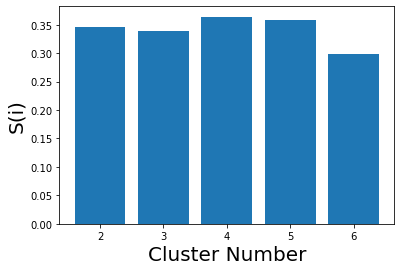

In [71]:
# Define K
k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(reduced, agg_2.fit_predict(reduced)))
silhouette_scores.append(
        silhouette_score(reduced, agg_3.fit_predict(reduced)))
silhouette_scores.append(
        silhouette_score(reduced, agg_4.fit_predict(reduced)))
silhouette_scores.append(
        silhouette_score(reduced, agg_5.fit_predict(reduced)))
silhouette_scores.append(
        silhouette_score(reduced, agg_6.fit_predict(reduced)))
# Define plot for solhouette score
plt.bar(k, silhouette_scores)
# define name label and font size for horizontal label
plt.xlabel('Cluster Number', fontsize = 20)
# define name label and font size for vertical label
plt.ylabel('S(i)', fontsize = 20)
# Showin plot
plt.show()

---

**RESULT**

* on the silhouette score of the clustering model using agglomerative give a statement if using 4 clusters is the most optimal for use in this session

---

### *Linkage Ward*

In [72]:
# Define cluster linkage
agg_ward = AC(n_clusters=4, linkage='ward')

In [73]:
# Fit data
agg_ward.fit_predict(reduced)

array([1, 2, 2, ..., 2, 2, 3])

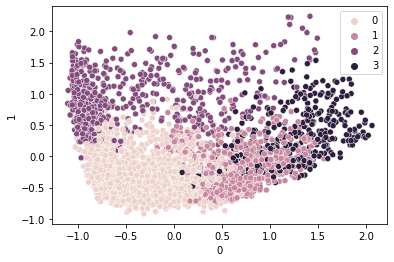

In [74]:
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_ward.fit_predict(X_train_final))

---

**RESULT**

* It can be seen that clusters 0 and 2 can be separated quite well, but there are several cluster 2 groups that ride in cluster 0

* It can be seen that cluster 1 does not have a bad enough separation due to a lot of data overlapping in different groups

---

### *Complete Linkage*

In [75]:
# Define final linkage
agg_final = AC(n_clusters=4, linkage='complete')

In [76]:
# Fit and predict train-set
agg_final.fit_predict(X_train_final)

array([0, 1, 1, ..., 1, 0, 0])

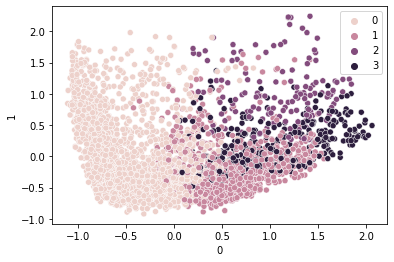

In [77]:
# Plot result with scatter plot
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_final.fit_predict(X_train_final));

---

**RESULT**

* In the visualization above, it can be seen that some clusters can be separated from other cluster groups quite well, but there are some clusters that ride in other groups, in this case it can be concluded that the results are not too perfect.

---

### *Linkage Average*

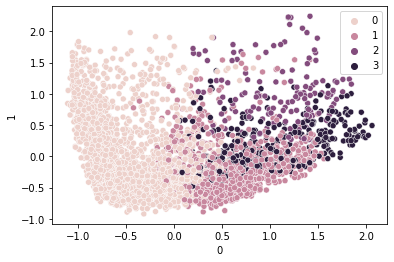

In [78]:
# Plot result with scatter plot
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_final.fit_predict(X_train_final));

---

**RESULT**

* The visualization reflects the same results as the previous visualization

---

### *Single Linkage*

In [79]:
# Define linkage
agg_single = AC(n_clusters=4, linkage='single')

In [80]:
# Fit predict train-set
agg_single.fit_predict(X_train_final)

array([0, 0, 0, ..., 0, 0, 0])

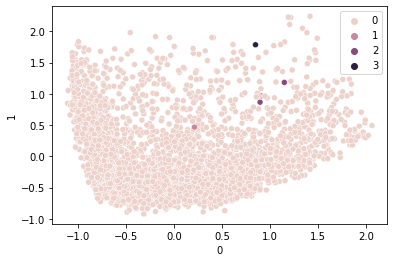

In [81]:
# Plot result with scatter plot
sns.scatterplot(x=reduced[0],y=reduced[1],hue=agg_single.fit_predict(X_train_final))

---

**RESULT**

* It can be seen that by using a single linkage, there is one point from another cluster that rides on cluster 0, from this last result it can be concluded that we can use linkage ward or linkage complete.

---

## Analysis from modelling

In [82]:
# Define data with predictions result using agglomeratitve linkage complete
df_clusters_agglomerative=pd.concat([df, pd.DataFrame({'cluster':agg_final.fit_predict(X_train_final)})], axis=1)
# Showin dataframe
df_clusters_agglomerative.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0     0.000000               NaN               0.0       8      0.0  
1     0.000000               NaN               0.0       8      1.0  
2  1494.480376       2638.598410               0.0       8      1.0  
3  3029.380326         85.428885               0.0       8      3.0  
4   215.316424        137.846006               0.0       8      0.0

In [83]:
# Grouping to see average result
groupby_cluster_agglomerative = df_clusters_agglomerative.groupby('cluster').mean()
# Showin dataframe
groupby_cluster_agglomerative

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0.0      1334.435902           0.869457  1116.639453        654.055982   
1.0      1184.228092           0.843397   995.759379        593.215565   
2.0      1487.043985           0.867075  1149.994648        696.173099   
3.0      1262.850866           0.869923  1219.569418        736.587590   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0.0                  462.890138    655.720773             0.535898   
1.0                  402.867539    609.614408             0.517688   
2.0                  453.821549    710.046913             0.541170   
3.0                  483.064931    532.909330             0.540984   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0.0                        0.218815                          0.399280   
1.0                        0.203706                          0.388085   
2.0                        0.200242                          0.440638   
3.0                        0.231264                          0.389547   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0.0                    0.085965          1.988046      16.480000   
1.0                    0.078326          1.864745      14.931264   
2.0                    0.089997          1.866197      17.373239   
3.0                    0.083114          1.792244      15.869806   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                  
0.0       4400.625357  1584.250595        837.266878          0.174977   
1.0       4367.067012  1675.949204        724.152470          0.174926   
2.0       4943.309859  1772.704813        660.800694          0.192619   
3.0       4443.150340  1599.628400        832.670164          0.190391   

            TENURE  
cluster             
0.0      11.537471  
1.0      11.562084  
2.0      11.626761  
3.0      11.559557

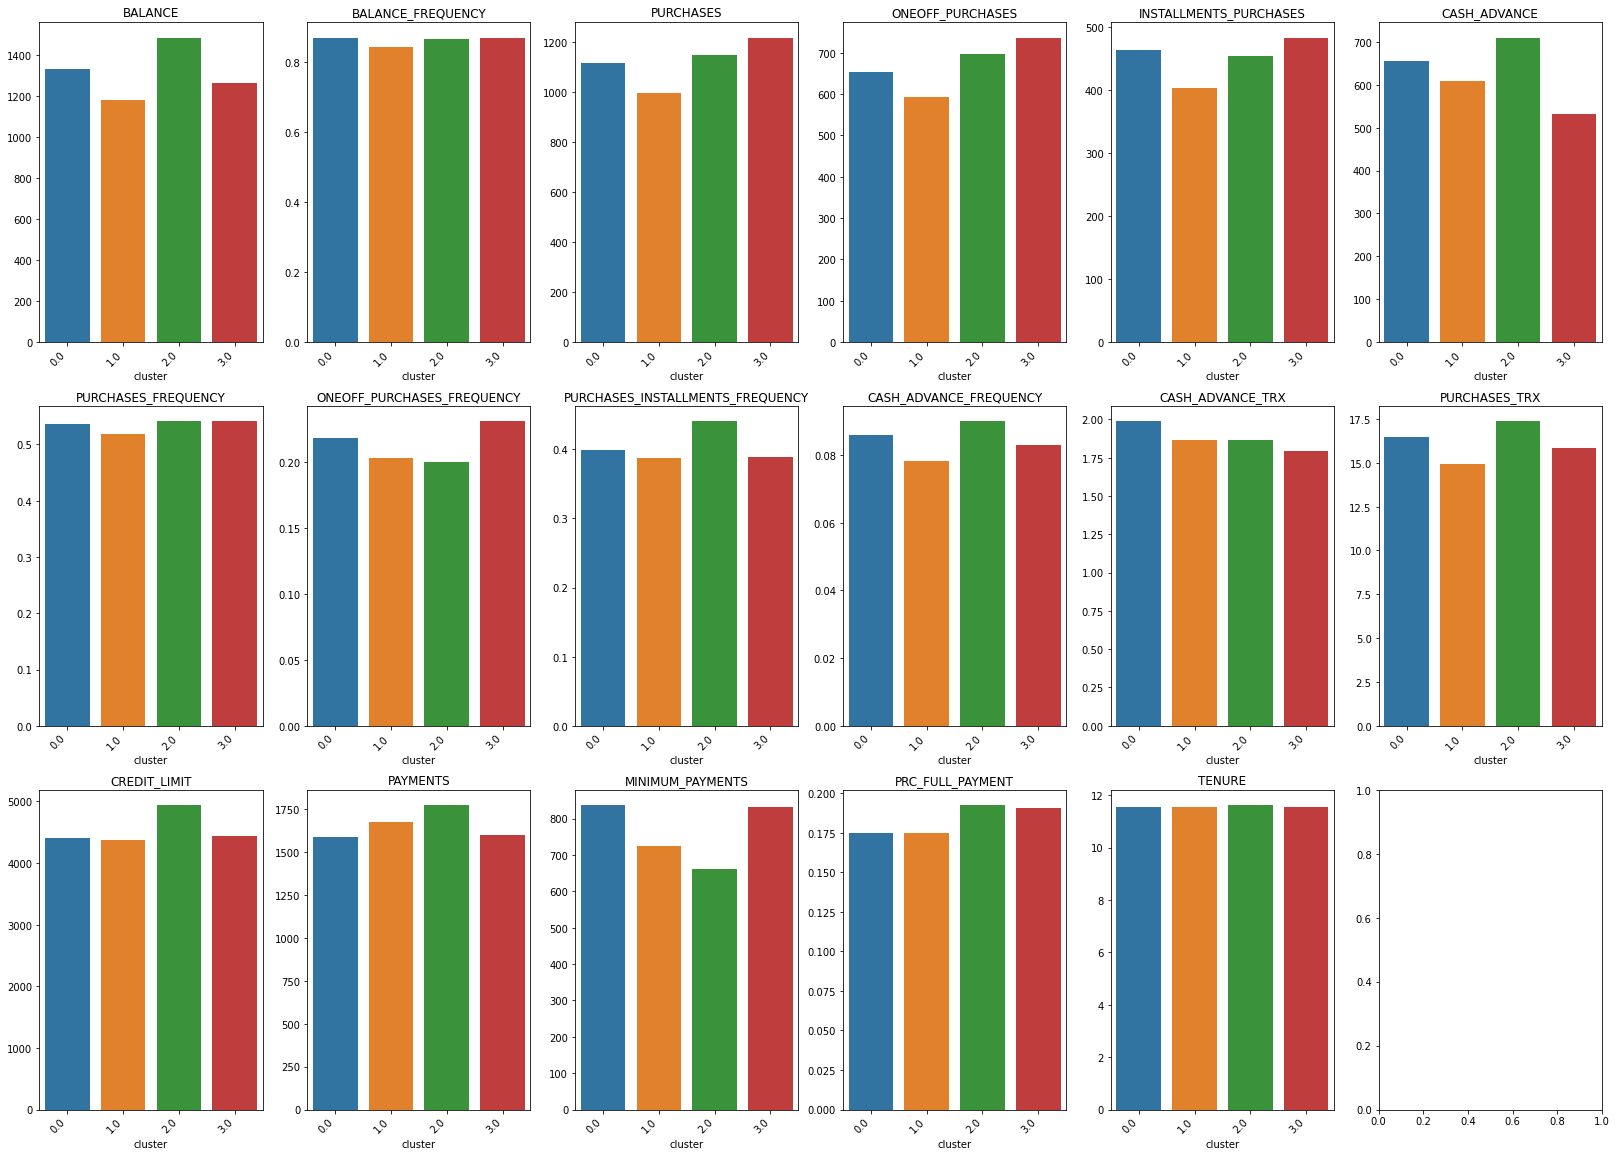

In [84]:
# Define plot size
fig,axes=plt.subplots(3,6, figsize=(28,20))
axe= axes.ravel()
# Showin plot with loop
for i,col in enumerate(groupby_cluster_agglomerative.columns):
    sns.barplot(x=groupby_cluster_agglomerative[col].index, y=groupby_cluster_agglomerative[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

---

#### ***Analysis from clustering results***

1. From the `balance` feature, each cluster is different from other clusters, the highest cluster is the third cluster, which means the group with the highest limit compared to other clusters, and the second cluster is the group with customers who have the lowest limit.

2. From `purchases', each cluster is different from other clusters, with the highest cluster being cluster 4, which means the group with the highest transaction expenditure compared to other clusters, and the second cluster is the group with the customer with the lowest transaction.

3. from `installment purchases`, each cluster is different from other clusters, with the highest cluster being cluster 4 which means the group with the highest installment payments compared to other clusters and only slightly different from the first cluster, and the second cluster is the group with customers who have installment payments the lowest

4. From the `cash_advance` feature, each cluster is different from other clusters, the highest cluster is the 2nd cluster which means the group with the lowest down payment compared to other clusters, and the 4th cluster is the group with the customer with the lowest down payment.

5. From all the results above, it can be concluded that if the payment is high, and the payment is high, then the down payment given is low, and vice versa if the payment is low, it means that the customer has a low down payment. down payment.

---

---

### *Modelling Conclusion*

* on the results of modeling using agglomerative clustering, it looks not too good than the results given by the K-means model, due to the many overlapping cluster predictions.

---

## Gaussian Mixture Clustering

In [85]:
# Define model with 3 cluster
gm=GaussianMixture(random_state=11, n_components=3)

In [86]:
# Train data
gm.fit(X_train_final)

GaussianMixture(n_components=3, random_state=11)

In [87]:
# see data share by percent
gm.weights_

array([0.28257039, 0.28111355, 0.43631606])

---

**RESULT**

* in cluster 0, divided by 28%
* in cluster 1, divided by 28%
* in cluster 2, divided by 43%

---

### Model Evaluation

In [88]:
# predict data
labels = gm.predict(X_train_final)
labels

array([0, 1, 2, ..., 1, 0, 2])

In [89]:
# AIC score
gm.aic(X_train_final)

7523.782748758912

In [90]:
# BIC score
gm.bic(X_train_final)

8036.981549348676

---

**RESULT**

* There is a significant difference between AIC and BIC scores

---

In [91]:
# Define Model per K
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=11).fit(X_train_final)
             for k in range(1, 7)]

In [92]:
# Define model with BIC
bics = [model.bic(X_train_final) for model in gms_per_k]
# Define model with AIC
aics = [model.aic(X_train_final) for model in gms_per_k]

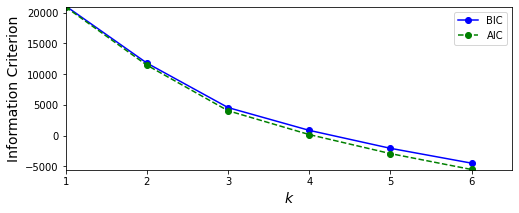

In [93]:
# Plot AIC and BIC

# Define size
plt.figure(figsize=(8, 3))
# Define BIC
plt.plot(range(1, 7), bics, "bo-", label="BIC")
# Define AIC
plt.plot(range(1, 7), aics, "go--", label="AIC")
# Define label
plt.xlabel("$k$", fontsize=14)
# Define label
plt.ylabel("Information Criterion", fontsize=14)
# Define line
plt.axis([1, 6.5, np.min(aics) - 50, np.max(aics) + 50])

# Showin plot            
plt.legend()
plt.show()

---

**RESULT**

* From the visualization above, it can be concluded that the optimal cluster is 6 clusters due to the separation of the lines ending in cluster 6 and the difference is not too far

---

In [94]:
min_bic = np.infty

for k in range(1, 7):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X_train_final).bic(X_train_final)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [95]:
print(best_k)
print(best_covariance_type)

6
full


---

**RESULTS**

* The results above state that the best cluster is 6 clusters and the best covariance is the full covariance type  

---

In [96]:
# Define gaussian mixture with 6 components and full covariance type
gm2=GaussianMixture(n_components=6, covariance_type='full', random_state=22)

In [97]:
# Predict data
gm2.fit_predict(X_train_final)

array([1, 3, 5, ..., 0, 4, 2])

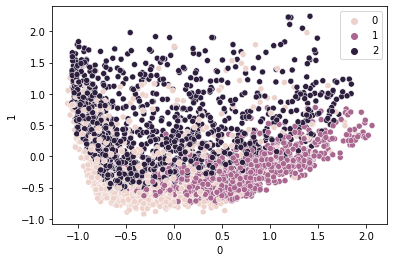

In [98]:
# Plot Gaussian with 3 cluster
sns.scatterplot(x=reduced[0],y=reduced[1],hue=gm.fit_predict(X_train_final));

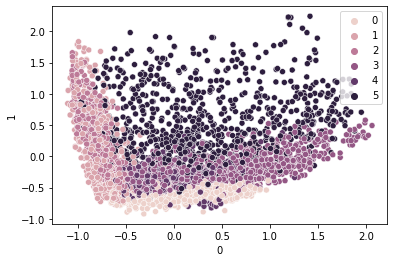

In [99]:
# Plot Gaussian with 6 cluster and full covariance type
sns.scatterplot(x=reduced[0],y=reduced[1],hue=gm2.fit_predict(X_train_final));

---

**RESULTS**

* From the visualization above, it can be seen if there are some data that overlap with other cluster groups

---

### Analysis from modelling

In [100]:
# Concate with predictions with dataframe
df_clusters_gaussian=pd.concat([df, pd.DataFrame({'cluster':gm2.fit_predict(X_train_final)})], axis=1)
df_clusters_gaussian.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    3.833185              0.125      45.00             45.00   
1    0.000000              0.000     176.03            176.03   
2  757.964752              0.875     157.40            157.40   
3  264.566591              0.375    1150.00           1150.00   
4  440.613643              1.000     600.00            600.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                               0.0   
1                       0.125                               0.0   
2                       0.125                               0.0   
3                       0.125                               0.0   
4                       0.125                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0     0.000000               NaN               0.0       8      1.0  
1     0.000000               NaN               0.0       8      3.0  
2  1494.480376       2638.598410               0.0       8      5.0  
3  3029.380326         85.428885               0.0       8      5.0  
4   215.316424        137.846006               0.0       8      1.0

In [101]:
# Grouping data to see average
groupby_cluster_gaussian = df_clusters_gaussian.groupby('cluster').mean()
groupby_cluster_gaussian

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0.0      1314.165504           0.863740  1253.436123        705.315805   
1.0      1338.497137           0.864867   940.808082        527.116108   
2.0      1246.913885           0.873259  1180.414240        737.502770   
3.0      1296.410368           0.848588  1073.998331        665.377215   
4.0      1167.703678           0.877502  1055.941634        607.829706   
5.0      1338.922192           0.862773  1085.766511        626.735980   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0.0                  548.164056    560.414734             0.570466   
1.0                  413.779497    718.436156             0.532033   
2.0                  442.911470    679.189776             0.542859   
3.0                  408.973643    600.170143             0.516091   
4.0                  448.177288    601.508446             0.520710   
5.0                  459.789064    638.048365             0.521017   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0.0                        0.208101                          0.444212   
1.0                        0.209757                          0.393087   
2.0                        0.242964                          0.399504   
3.0                        0.210087                          0.386493   
4.0                        0.205590                          0.381740   
5.0                        0.213328                          0.385501   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0.0                    0.071508          1.580517      17.423459   
1.0                    0.091516          2.193669      15.052142   
2.0                    0.084895          2.081081      18.128378   
3.0                    0.081302          1.925969      14.768508   
4.0                    0.086550          1.924837      15.212418   
5.0                    0.087694          1.877370      16.063211   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                  
0.0       4333.504528  1819.934153        895.662894          0.168596   
1.0       4337.797528  1462.398797       1020.073802          0.167243   
2.0       4308.875921  1589.841466        826.373869          0.175015   
3.0       4458.355589  1534.911101        747.422023          0.177800   
4.0       4238.398693  1604.162194        558.209893          0.210919   
5.0       4633.839022  1703.713025        728.252795          0.177459   

            TENURE  
cluster             
0.0      11.532803  
1.0      11.491620  
2.0      11.614865  
3.0      11.524089  
4.0      11.529412  
5.0      11.585335

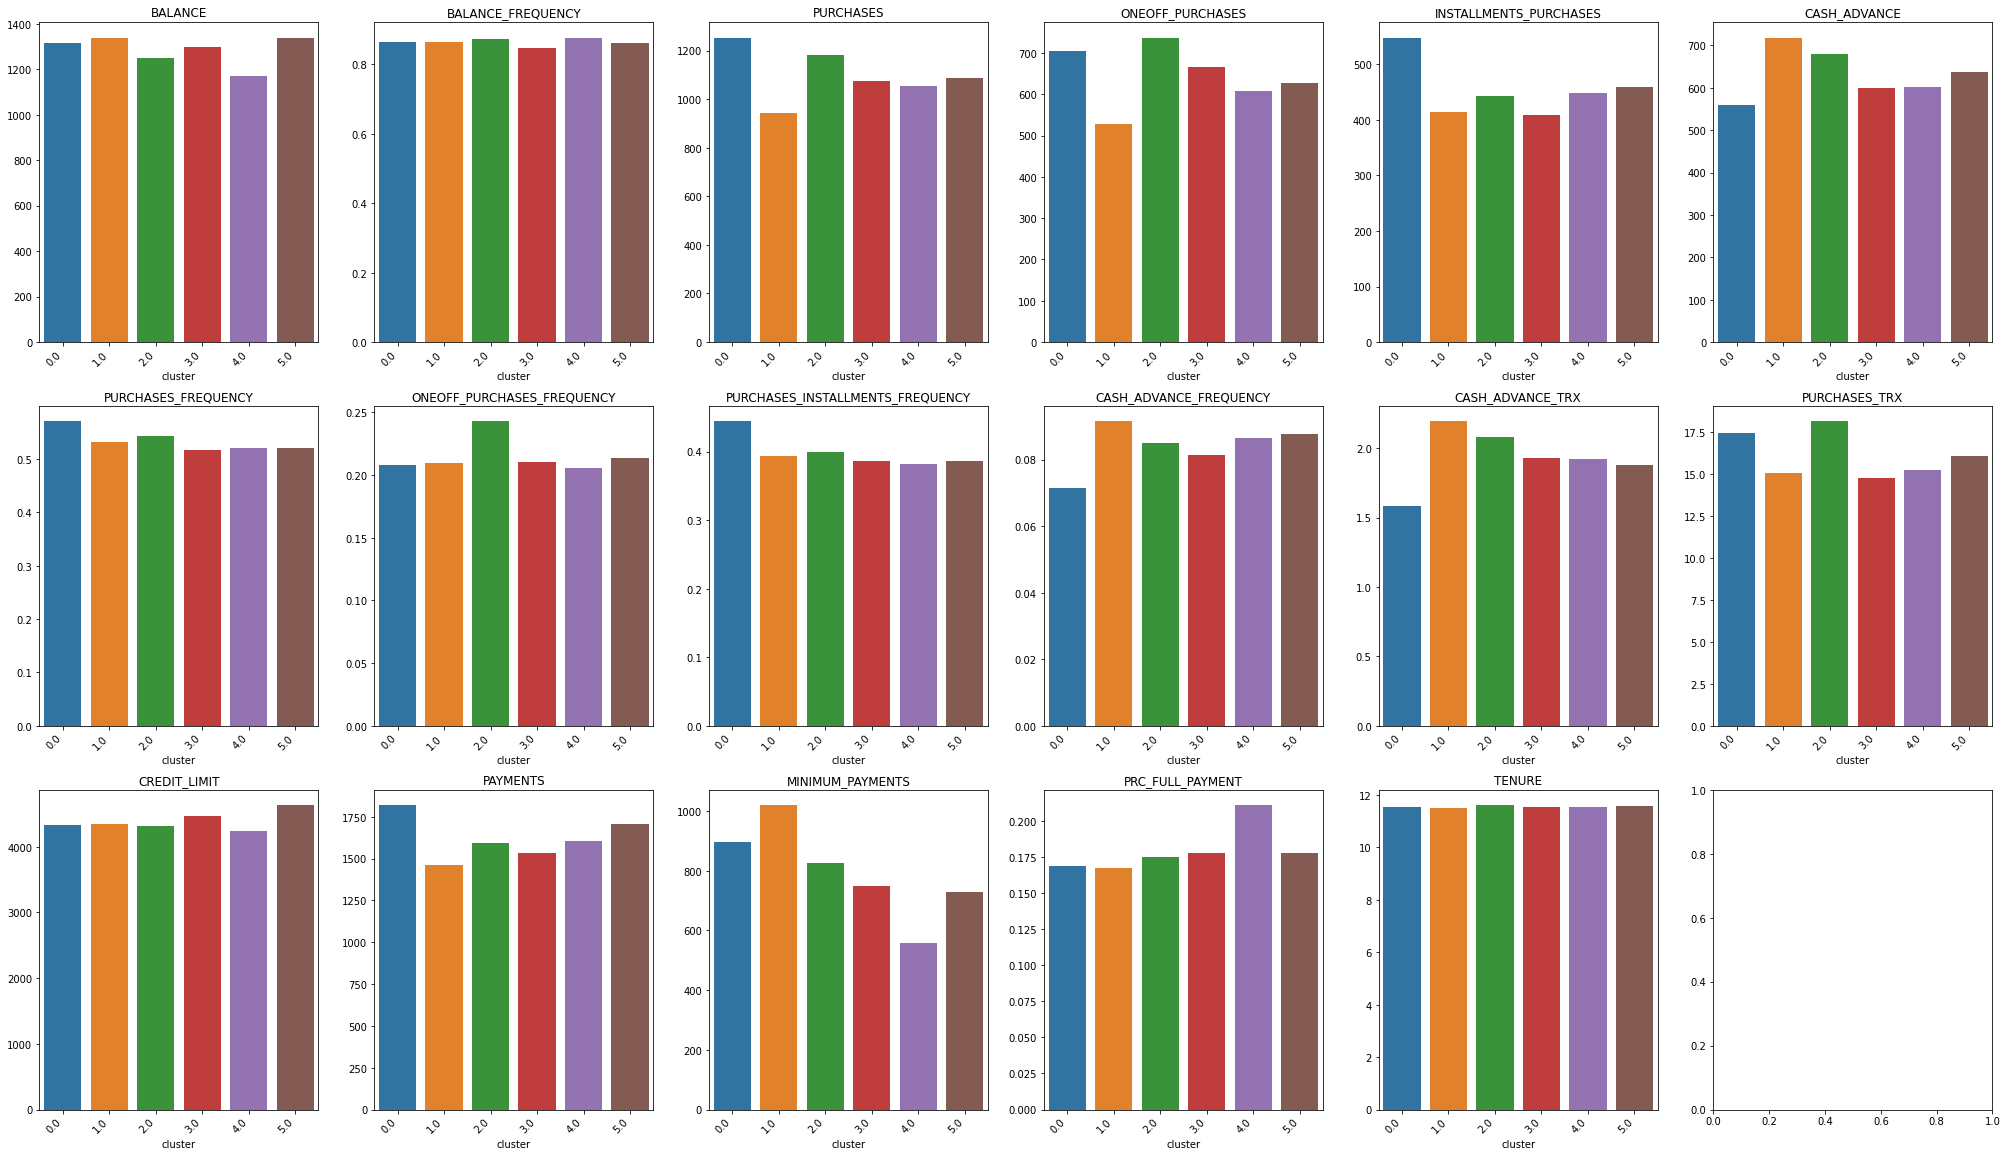

In [102]:
# Define size plot
fig,axes=plt.subplots(3,6, figsize=(35,20))
axe= axes.ravel()
# Plot result with loop
for i,col in enumerate(groupby_cluster_gaussian.columns):
    sns.barplot(x=groupby_cluster_gaussian[col].index, y=groupby_cluster_gaussian[col].values, ax=axe[i])
    axe[i].set_xticklabels(axe[i].get_xticklabels(), rotation=45, ha='right')
    axe[i].set_title(col)
plt.show()

---

#### ***Analysis from clustering results***

1. From the `balance` feature, each cluster is different from other clusters, the highest cluster is the third cluster, which means the group with the highest limit compared to other clusters, and the second cluster is the group with customers who have the lowest limit.

2. From `purchases', each cluster is different from other clusters, with the highest cluster being cluster 4, which means the group with the highest transaction expenditure compared to other clusters, and the second cluster is the group with the customer with the lowest transaction.

3. from `installment purchases`, each cluster is different from other clusters, with the highest cluster being cluster 4 which means the group with the highest installment payments compared to other clusters and only slightly different from the first cluster, and the second cluster is the group with customers who have installment payments the lowest

4. From the `cash_advance` feature, each cluster is different from other clusters, the highest cluster is the 2nd cluster which means the group with the lowest down payment compared to other clusters, and the 4th cluster is the group with the customer with the lowest down payment.

5. From all the results above, it can be concluded that if the payment is high, and the payment is high, then the down payment given is low, and vice versa if the payment is low, it means that the customer has a low down payment. down payment.

---

---

#### ***Modelling Conclusion***

* on the results of modeling using Gaussian mixture clustering, it looks not too good than the results given by the K-means model, due to the many overlapping cluster predictions.

---


# ***OVERALL CONCLUSION***

---

## *Analysis Conclusion*

1. there are customers who have more payments have more limits than other customers.

2. Customers who make transactions with installments are mostly customers who have a limit below the average

3. Customers who make installments are mostly customers who have below average limits

4. Customers who manage to get a large limit, are likely customers who have tenure under 6 months

5. Customers who have more contributions in payments can have a fairly large limit than other customers.

6. `CUST_ID`,`BALANCE`,`BALANCE_FREQUENCY` are independent features and do not depend on other features.

7. features containing data about `PURCHASES` depend on each other's features, this condition is also experienced with features containing payment `frequency` and customer payment conditions.

8. all features can be said to be well correlated with the target, except `CASH_ADVANCE_FREQUENCY` but it is not too bad because the value is only small enough to be declared non-correlated.


9. From the `balance` feature, each cluster is different from other clusters, the highest cluster is the third cluster, which means the group with the highest limit compared to other clusters, and the second cluster is the group with customers who have the lowest limit.

10. From `purchases', each cluster is different from other clusters, with the highest cluster being cluster 4, which means the group with the highest transaction expenditure compared to other clusters, and the second cluster is the group with the customer with the lowest transaction.

11. from `installment purchases`, each cluster is different from other clusters, with the highest cluster being cluster 4 which means the group with the highest installment payments compared to other clusters and only slightly different from the first cluster, and the second cluster is the group with customers who have installment payments the lowest

12. From the `cash_advance` feature, each cluster is different from other clusters, the highest cluster is the 2nd cluster which means the group with the lowest down payment compared to other clusters, and the 4th cluster is the group with the customer with the lowest down payment.

13. From all the results above, it can be concluded that if the payment is high, and the payment is high, then the down payment given is low, and vice versa if the payment is low, it means that the customer has a low down payment. down payment.

---



---

## *Model Conclusion*

* overall the model looks good in clustering data, each prediction provides advantages and disadvantages in providing information, but it can be concluded that the three models can provide the same insight, because the results provide conclusions that are not much different, and the difference is only in the way the model predicts with stable.

---

---

## Answer the following questions:

1. What is meant by inertia in the K-Means algorithm?

2. Explain what is meant by the Elbow Method (reason for use, how to use it, weaknesses/strengths, etc.) !

3. Explain the difference between each clustering algorithm that you use in this case!

---

## *Answer :*

1. Inertia is a parameter in the k-means to set the weighting on the results of the k-means clustering

2. The elbow method is a method used to determine how many clusters are appropriate for the model by comparing them based on SSE (Sum of Square Error), usually the drawback of this method is that this method only produces metrics from the error.

3. From the k-means and gaussian mix models, we can see the difference where the k-means model always has differences in each clustering and the agglomerative model is almost the same but not as dynamic as the k means model, and the agglomerative clustering model is different from the 2 models, because the results are different. not dynamic, it can be seen when evaluating the model where the results of linkage ward and complete linkage are not much different

---